# Data Visualization (month wise)


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox as ljungbox
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
Dec = pd.read_csv('gdrive/My Drive/DATA/Walkin_temp/Dec.csv')
Feb = pd.read_csv('gdrive/My Drive/DATA/Walkin_temp/Feb.csv')
Jan = pd.read_csv('gdrive/My Drive/DATA/Walkin_temp/Jan.csv')
Nov = pd.read_csv('gdrive/My Drive/DATA/Walkin_temp/Nov.csv')
novef = pd.read_csv('gdrive/My Drive/DATA/1min_extfridge/decef.csv',skiprows = [0,1,2,3,4,5,6,7,8,9,10], names = ['Date','Time','Zone','Temperature (F)'], 
                          skip_blank_lines = True, skipfooter = 1, engine = 'python')
decef = pd.read_csv('gdrive/My Drive/DATA/1min_extfridge/decef.csv',skiprows = [0,1,2,3,4,5,6,7,8,9,10], names = ['Date','Time','Zone','Temperature (F)'], 
                          skip_blank_lines = True, skipfooter = 1, engine = 'python')
janef = pd.read_csv('gdrive/My Drive/DATA/1min_extfridge/decef.csv',skiprows = [0,1,2,3,4,5,6,7,8,9,10], names = ['Date','Time','Zone','Temperature (F)'], 
                          skip_blank_lines = True, skipfooter = 1, engine = 'python')

In [0]:
novef['Dt'] = novef['Date']+str(' ')+novef['Time']
decef['Dt'] = decef['Date']+str(' ')+decef['Time']
janef['Dt'] = janef['Date']+str(' ')+decef['Time']
Dec['Dt'] = Dec['Date']+str(' ')+Dec['Time']
Nov['Dt'] = Nov['Date']+str(' ')+Nov['Time']
Jan['Dt'] = Jan['Date']+str(' ')+Jan['Time']
Feb['Dt'] = Feb['Date']+str(' ')+Feb['Time']

In [5]:
for i in [Dec,Feb,Jan,Nov,novef,decef,janef]:
  i['Dt'] = pd.to_datetime(i['Dt'])
  i['Temp'] = i['Temperature (F)']
  i.drop(['Date','Time','Temperature (F)','Zone'], axis=1,inplace=True)  # Dropping the other columns
  i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25488 entries, 0 to 25487
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dt      25488 non-null  datetime64[ns]
 1   Temp    25488 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 398.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8008 entries, 0 to 8007
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dt      8008 non-null   datetime64[ns]
 1   Temp    8008 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 125.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35364 entries, 0 to 35363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dt      35364 non-null  datetime64[ns]
 1   Temp    35364 non-null  float64       
dtypes: datetime64[ns](1), f

In [6]:
for i in [Dec,Jan,Feb,Nov,novef,janef,decef]:
  i.set_index('Dt',inplace=True)
  print(i.isnull().sum())

Temp    0
dtype: int64
Temp    0
dtype: int64
Temp    0
dtype: int64
Temp    0
dtype: int64
Temp    0
dtype: int64
Temp    0
dtype: int64
Temp    0
dtype: int64


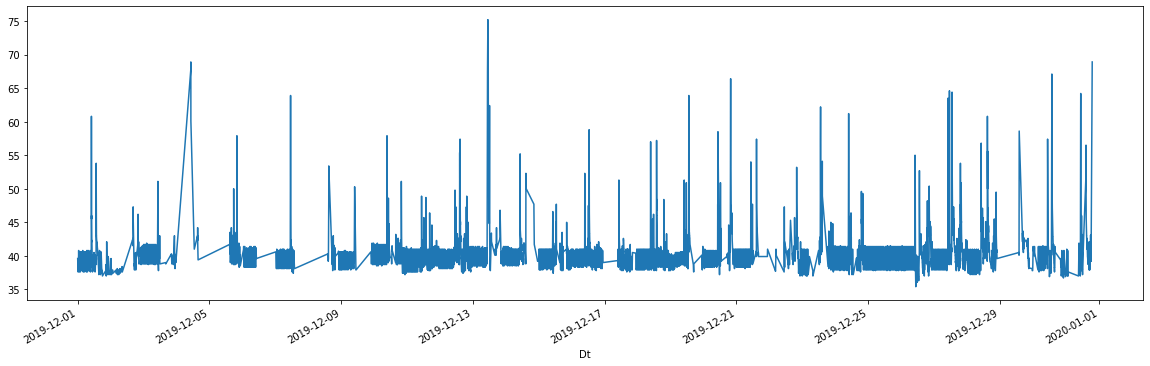

In [7]:
Dec['Temp'].plot(figsize=(20,6))

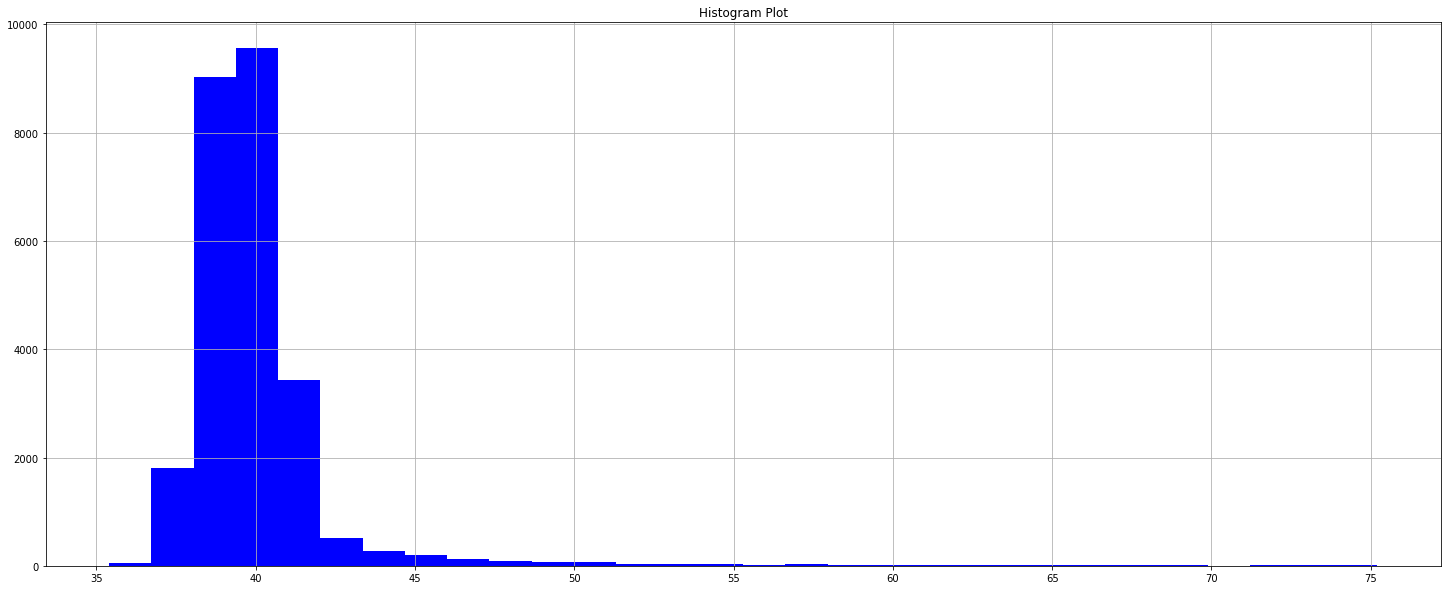

In [8]:
# Histogram 
Dec.hist(figsize=(25,10), bins=30, color='b')
plt.title('Histogram Plot')
plt.show()

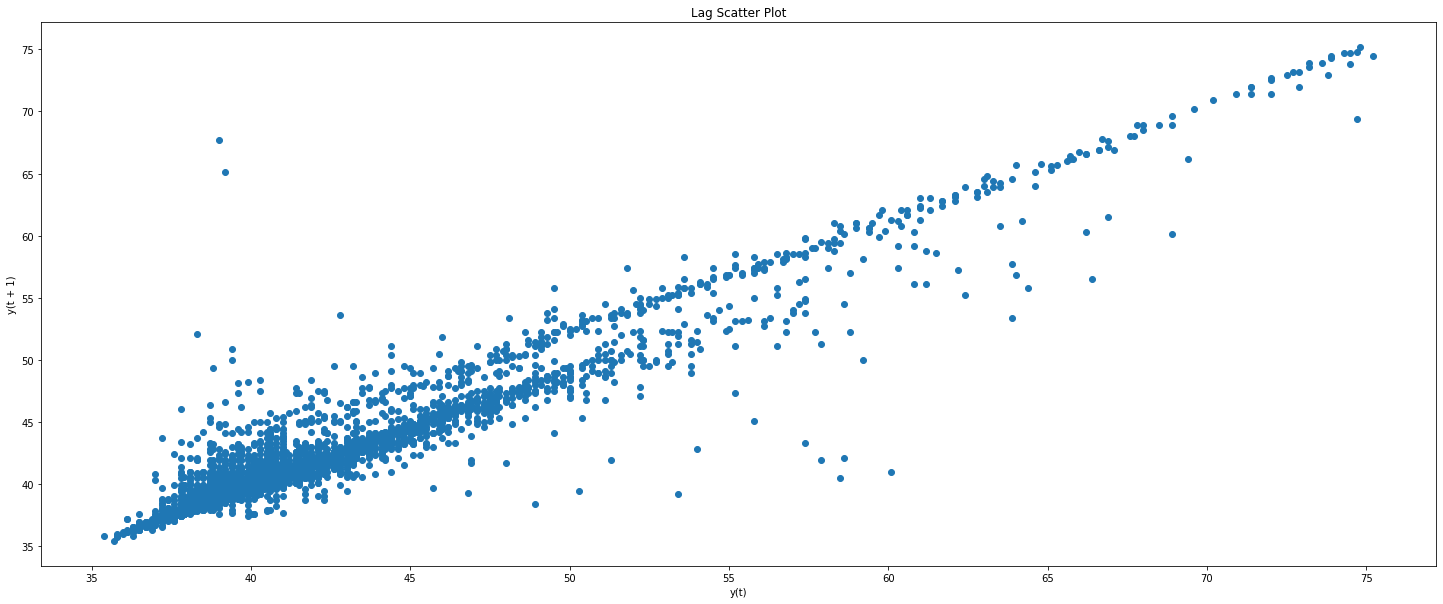

In [9]:
plt.figure(figsize=(25,10))
pd.plotting.lag_plot(Dec, lag=1)
plt.title('Lag Scatter Plot')
plt.show()

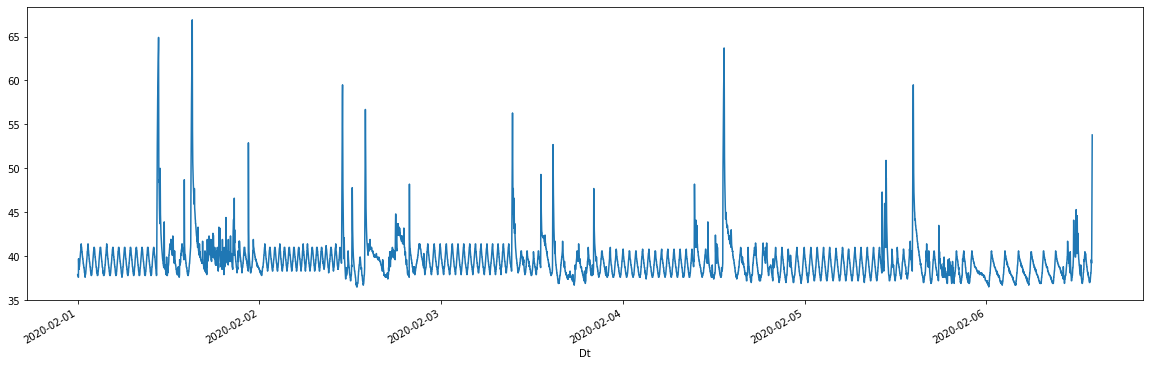

In [10]:
Feb['Temp'].plot(figsize=(20,6))

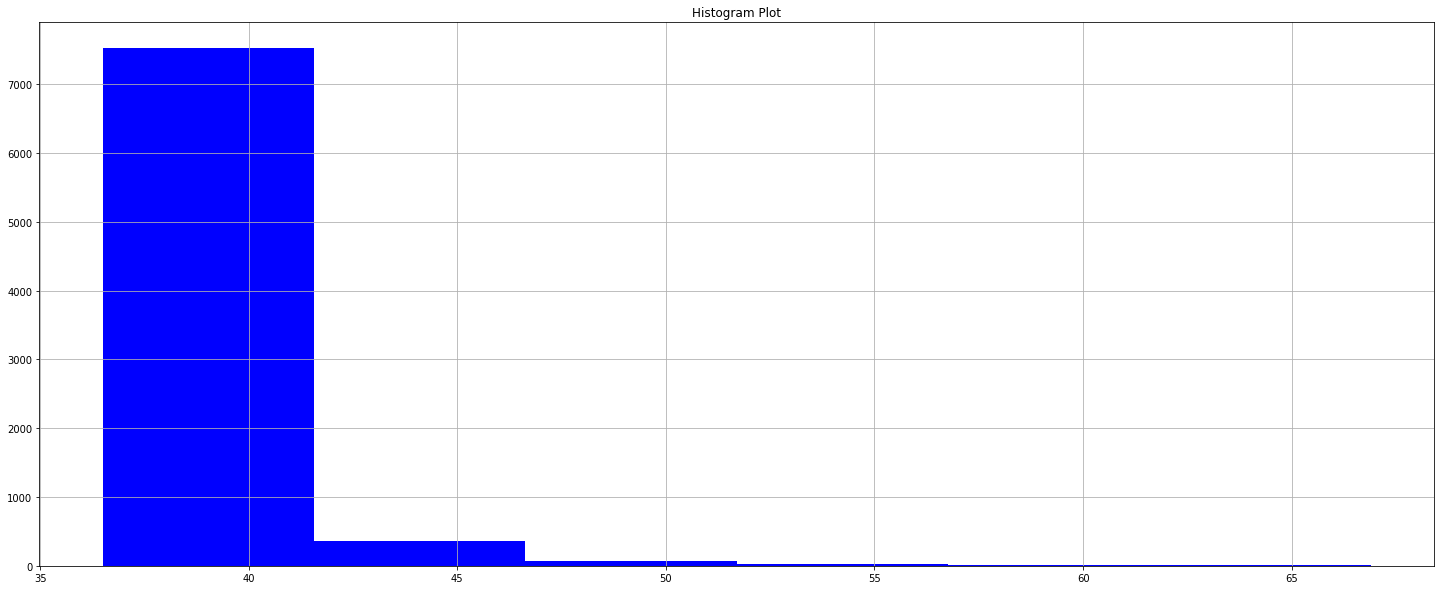

In [11]:
# Histogram 
Feb.hist(figsize=(25,10), bins=6, color='b')
plt.title('Histogram Plot')
plt.show()

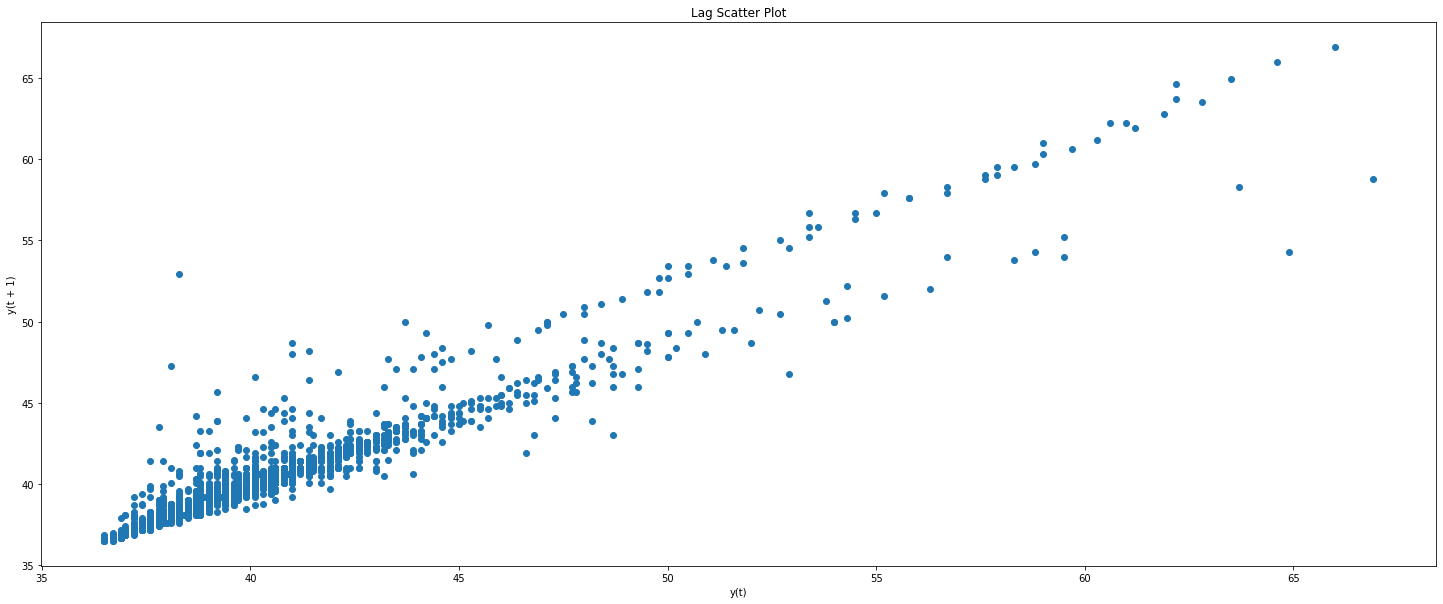

In [12]:
plt.figure(figsize=(25,10))
pd.plotting.lag_plot(Feb, lag=1)
plt.title('Lag Scatter Plot')
plt.show()

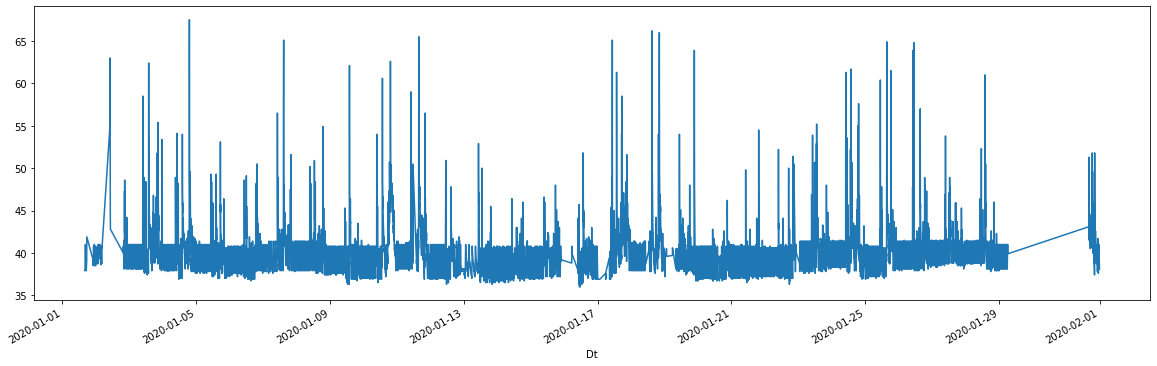

In [13]:
Jan['Temp'].plot(figsize=(20,6))

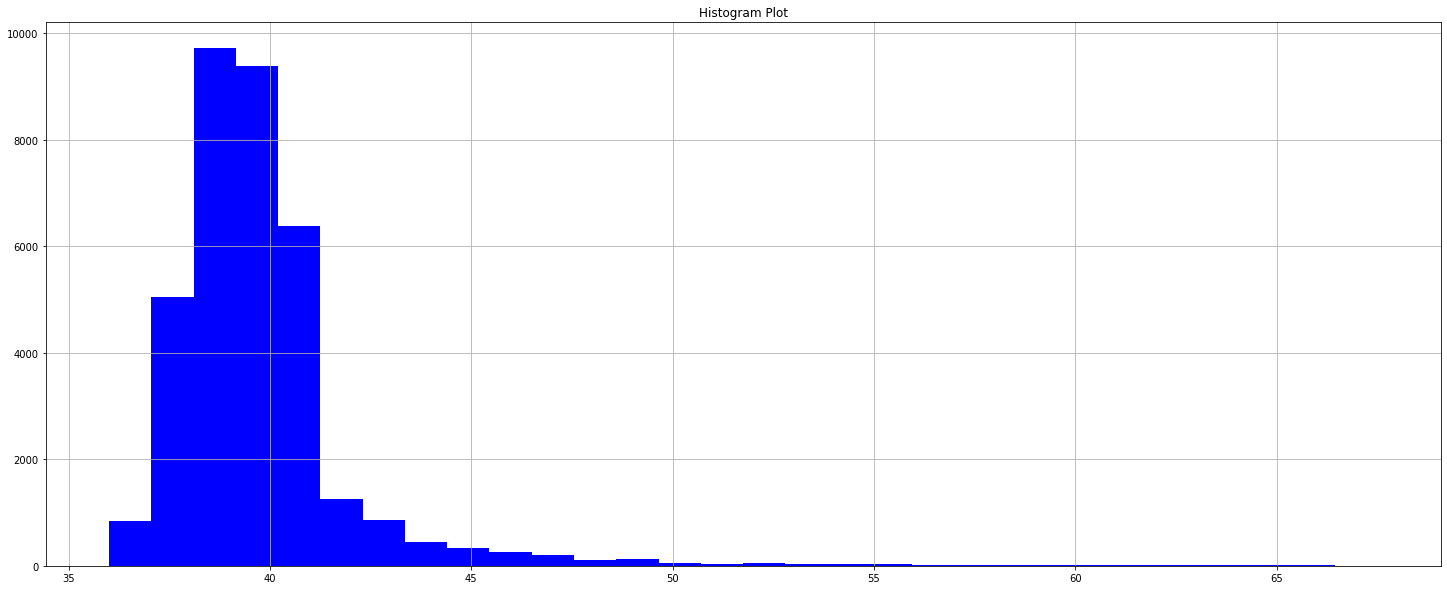

In [14]:
# Histogram 
Jan.hist(figsize=(25,10), bins=30, color='b')
plt.title('Histogram Plot')
plt.show()

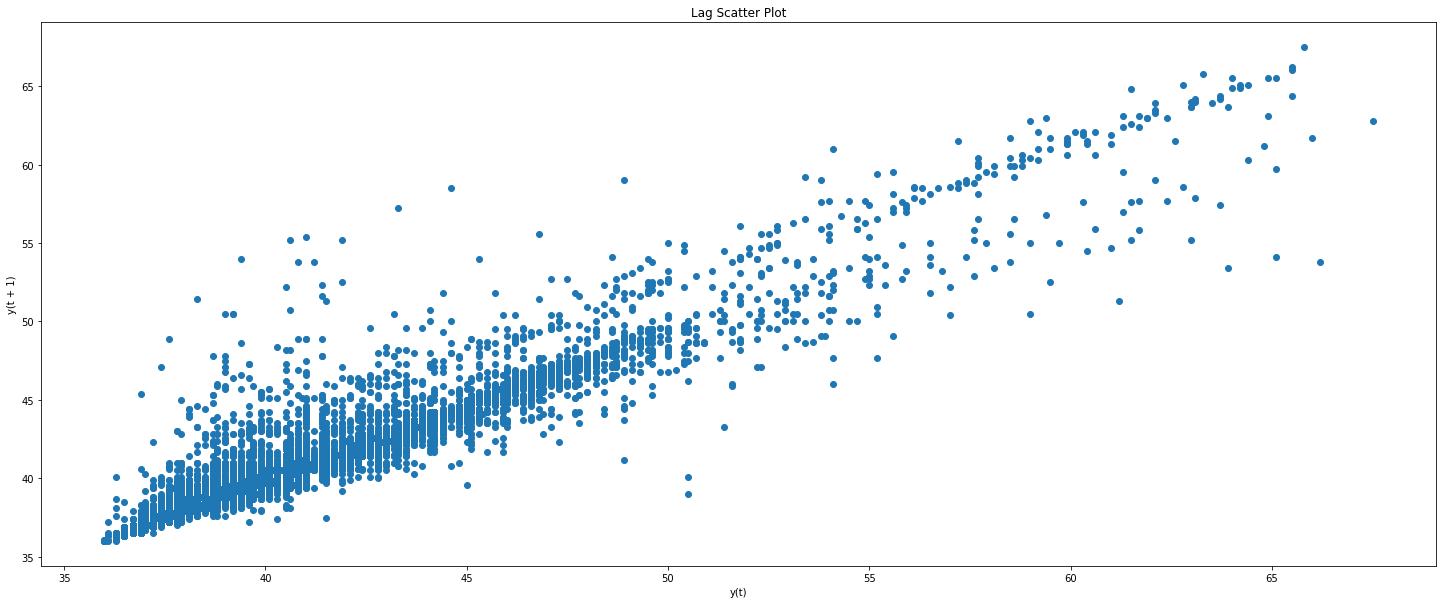

In [15]:
plt.figure(figsize=(25,10))
pd.plotting.lag_plot(Jan, lag=1)
plt.title('Lag Scatter Plot')
plt.show()

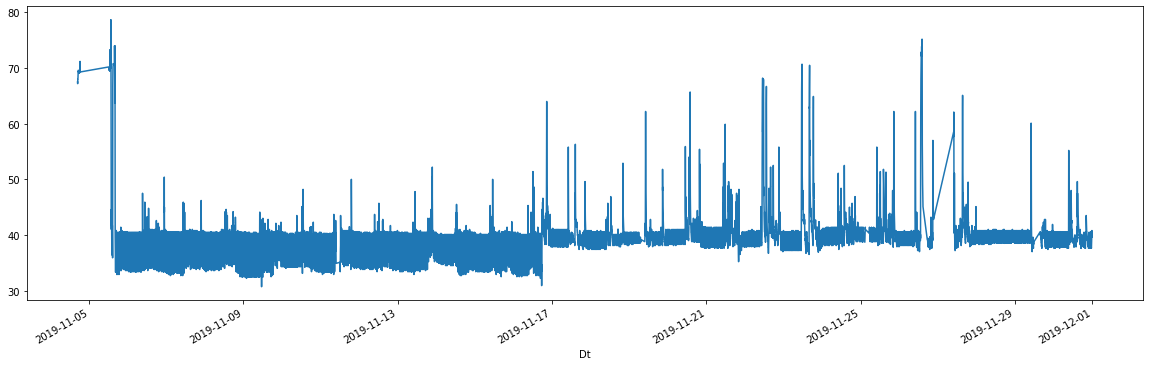

In [16]:
Nov['Temp'].plot(figsize=(20,6))

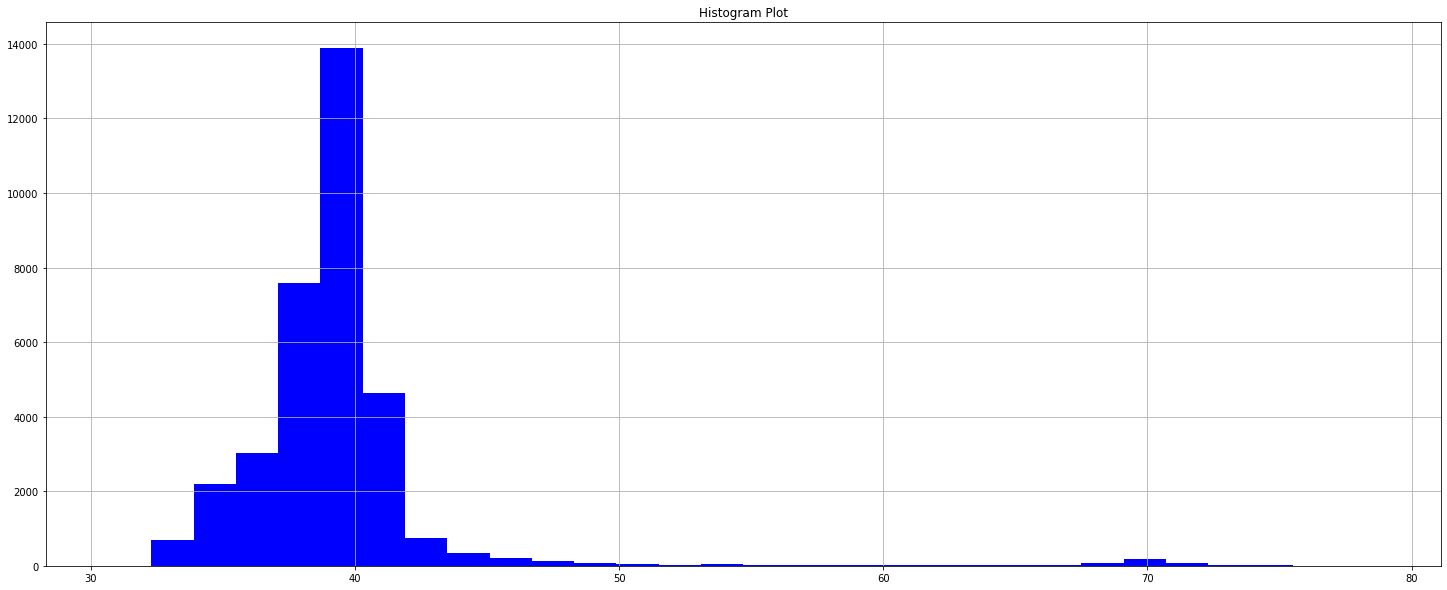

In [17]:
# Histogram 
Nov.hist(figsize=(25,10), bins=30, color='b')
plt.title('Histogram Plot')
plt.show()

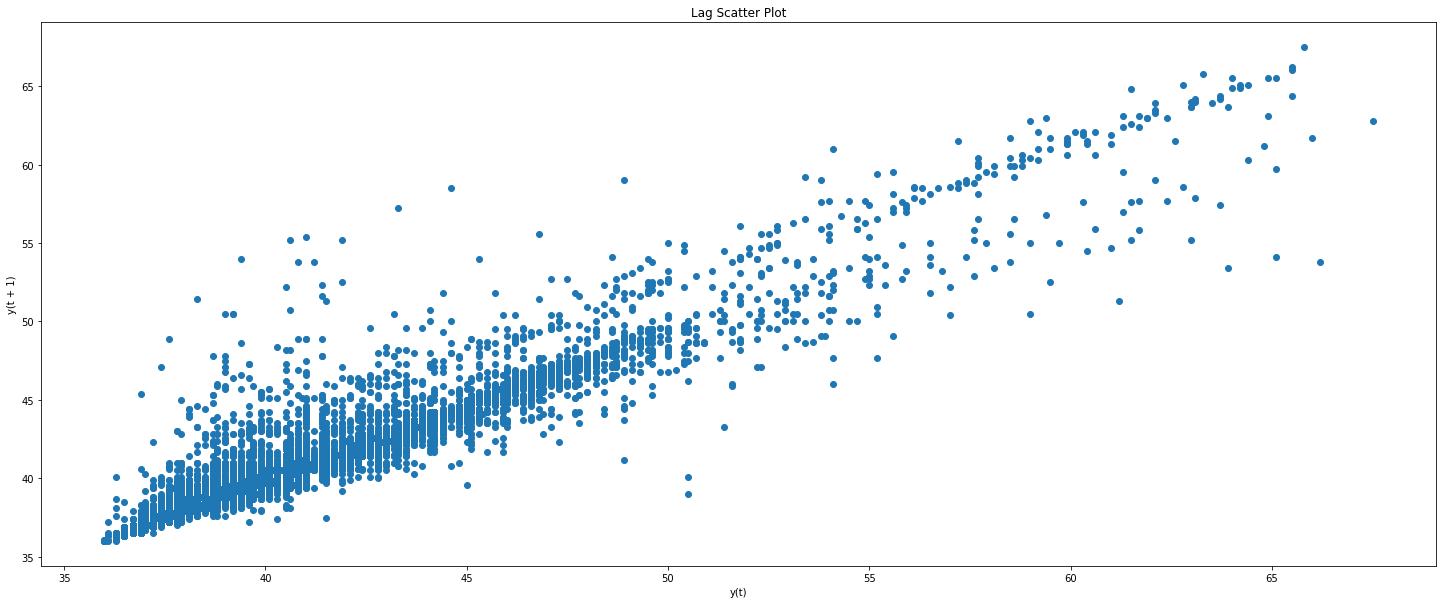

In [18]:
plt.figure(figsize=(25,10))
pd.plotting.lag_plot(Jan, lag=1)
plt.title('Lag Scatter Plot')
plt.show()

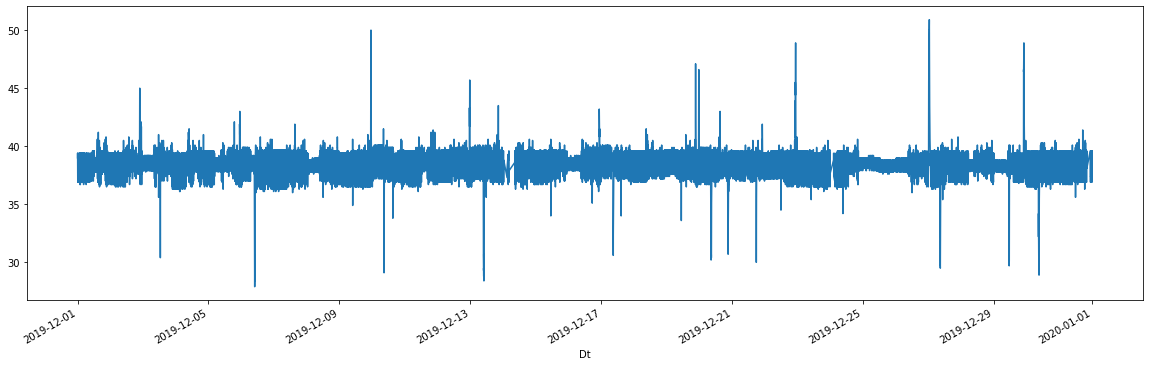

In [19]:
novef['Temp'].plot(figsize=(20,6))

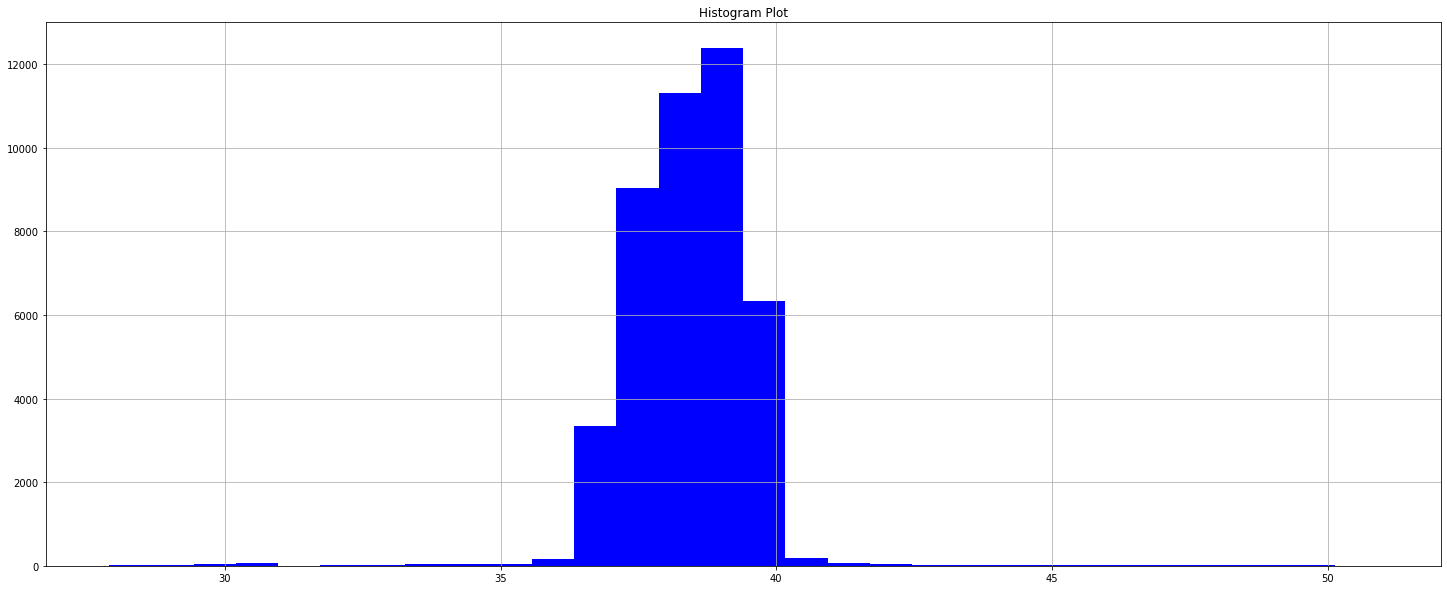

In [20]:
# Histogram 
novef.hist(figsize=(25,10), bins=30, color='b')
plt.title('Histogram Plot')
plt.show()

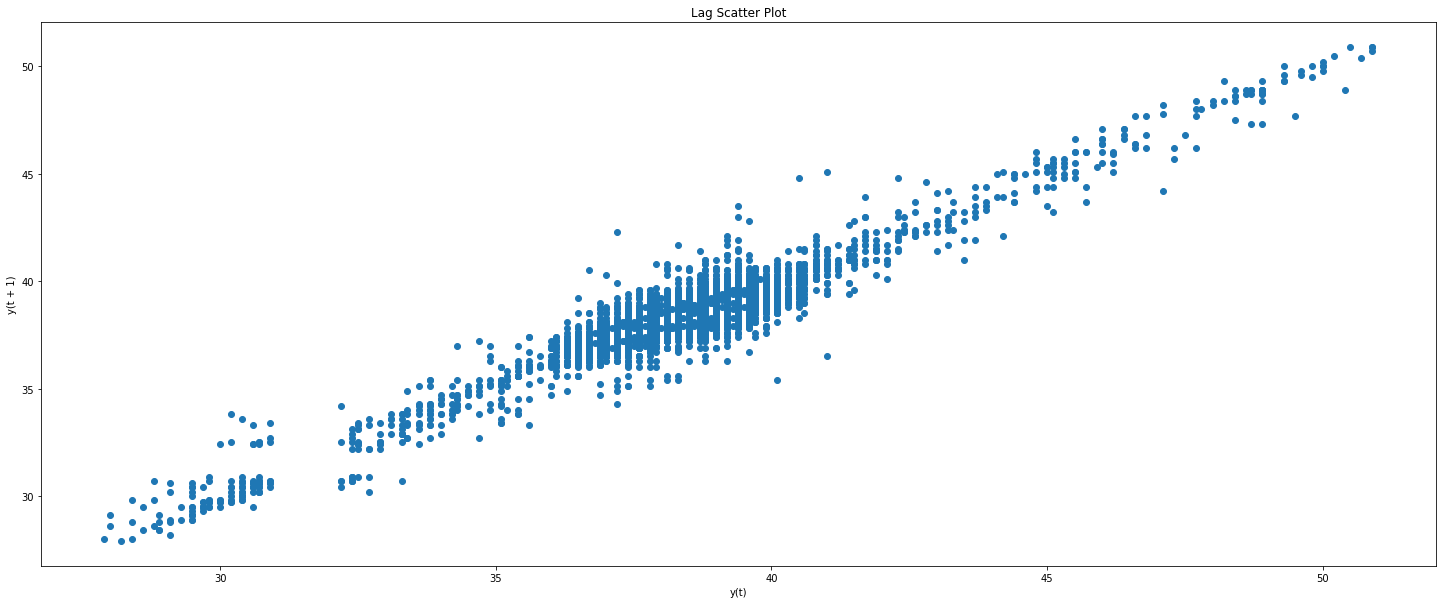

In [21]:
plt.figure(figsize=(25,10))
pd.plotting.lag_plot(novef, lag=1)
plt.title('Lag Scatter Plot')
plt.show()

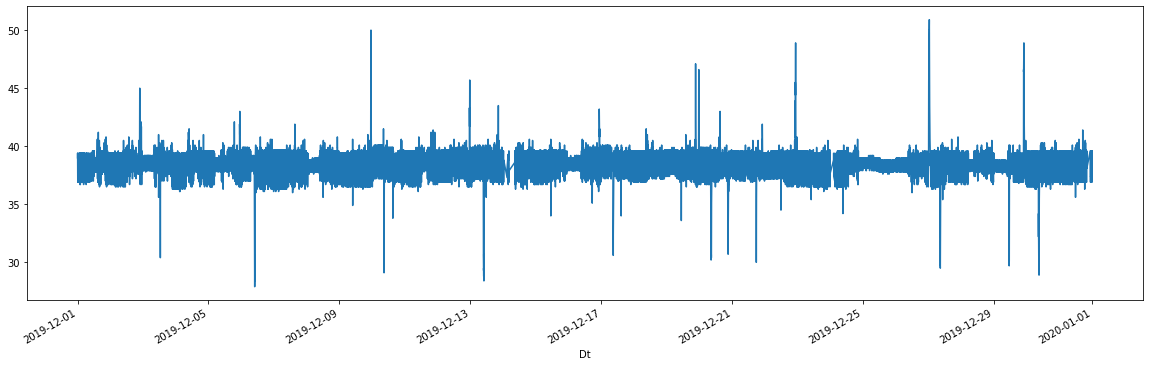

In [22]:
decef['Temp'].plot(figsize=(20,6))

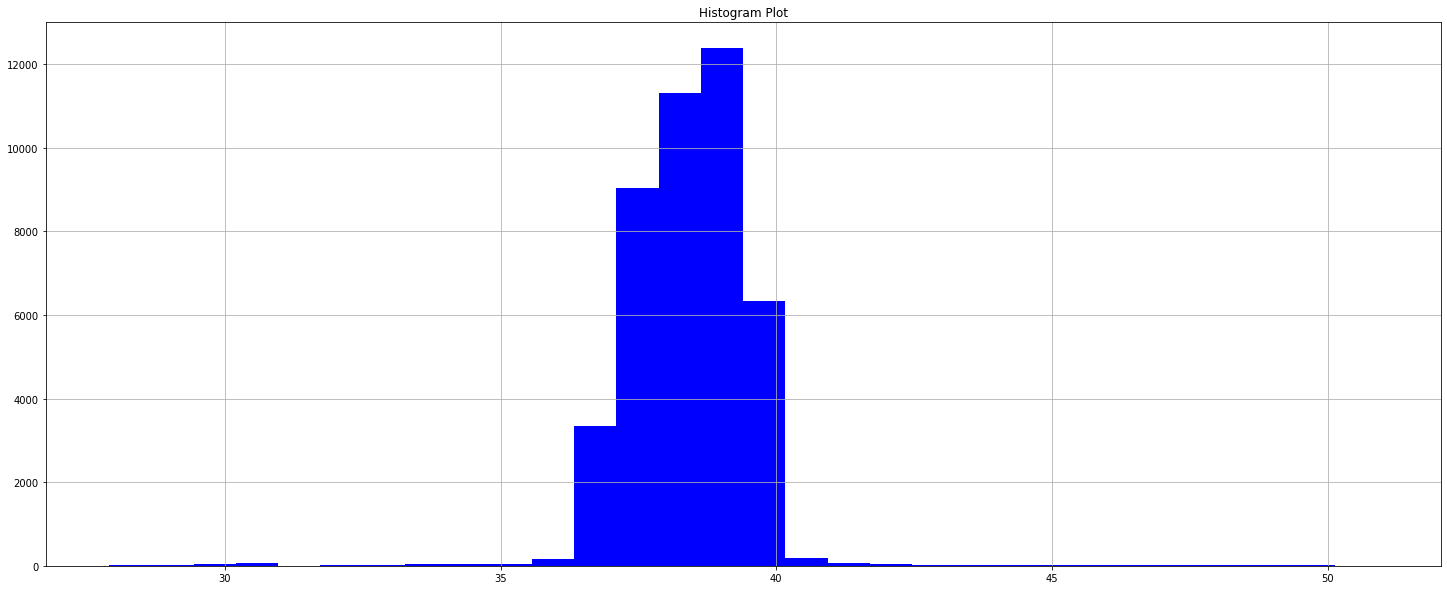

In [23]:
# Histogram 
decef.hist(figsize=(25,10), bins=30, color='b')
plt.title('Histogram Plot')
plt.show()

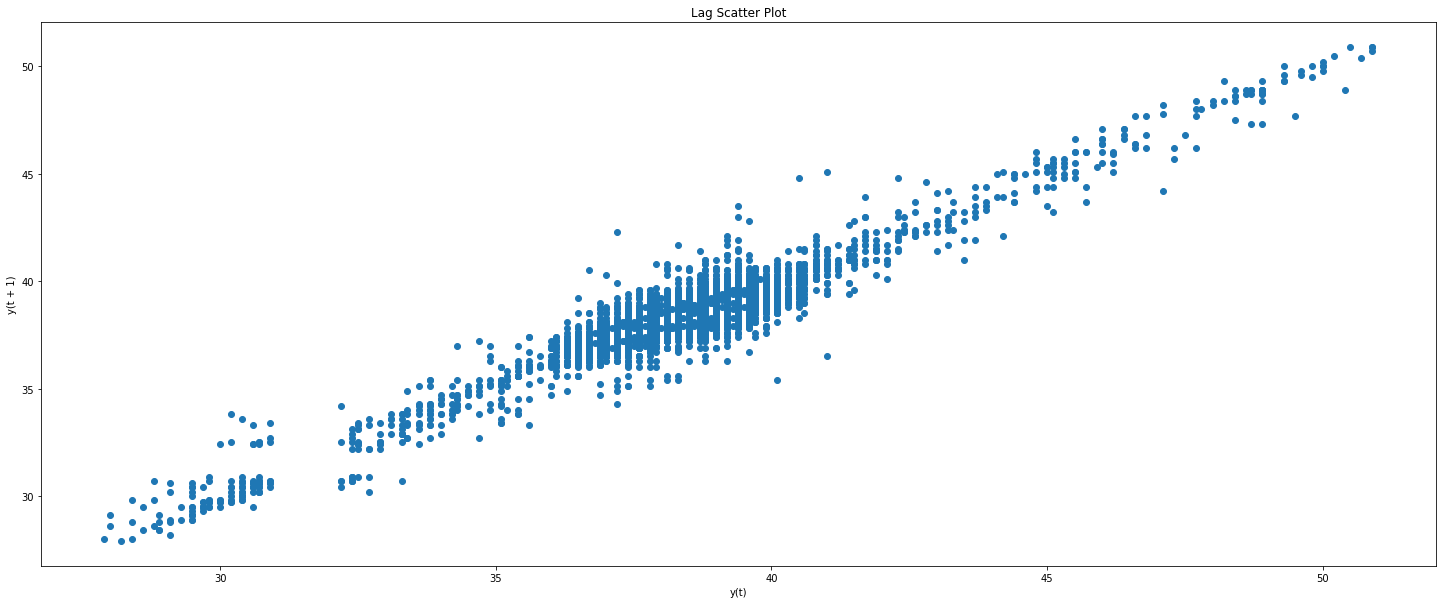

In [24]:
plt.figure(figsize=(25,10))
pd.plotting.lag_plot(decef, lag=1)
plt.title('Lag Scatter Plot')
plt.show()

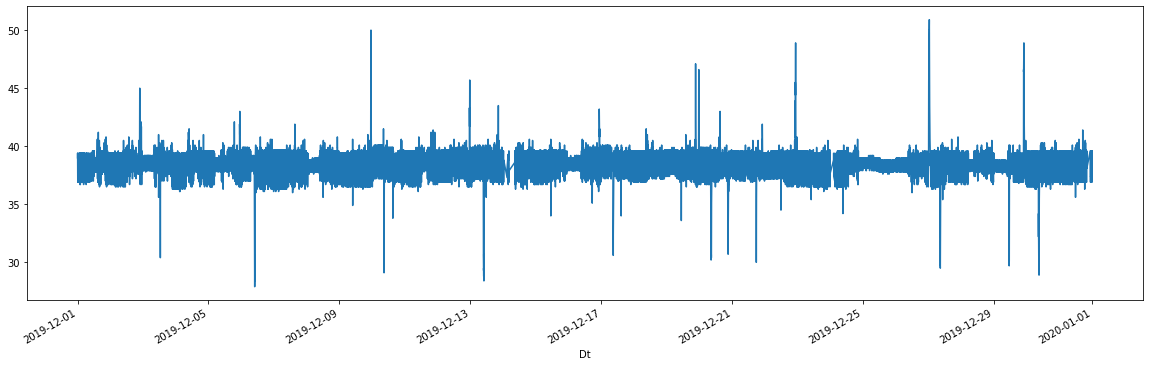

In [25]:
janef['Temp'].plot(figsize=(20,6))

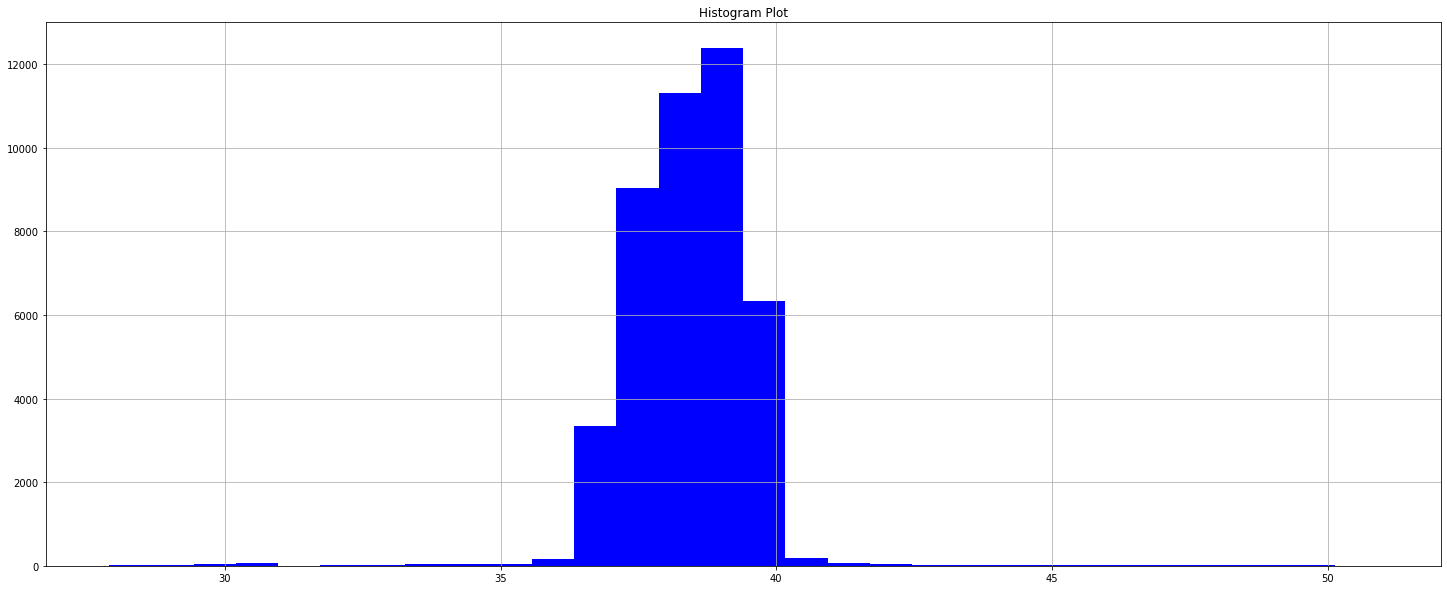

In [26]:
# Histogram 
janef.hist(figsize=(25,10), bins=30, color='b')
plt.title('Histogram Plot')
plt.show()

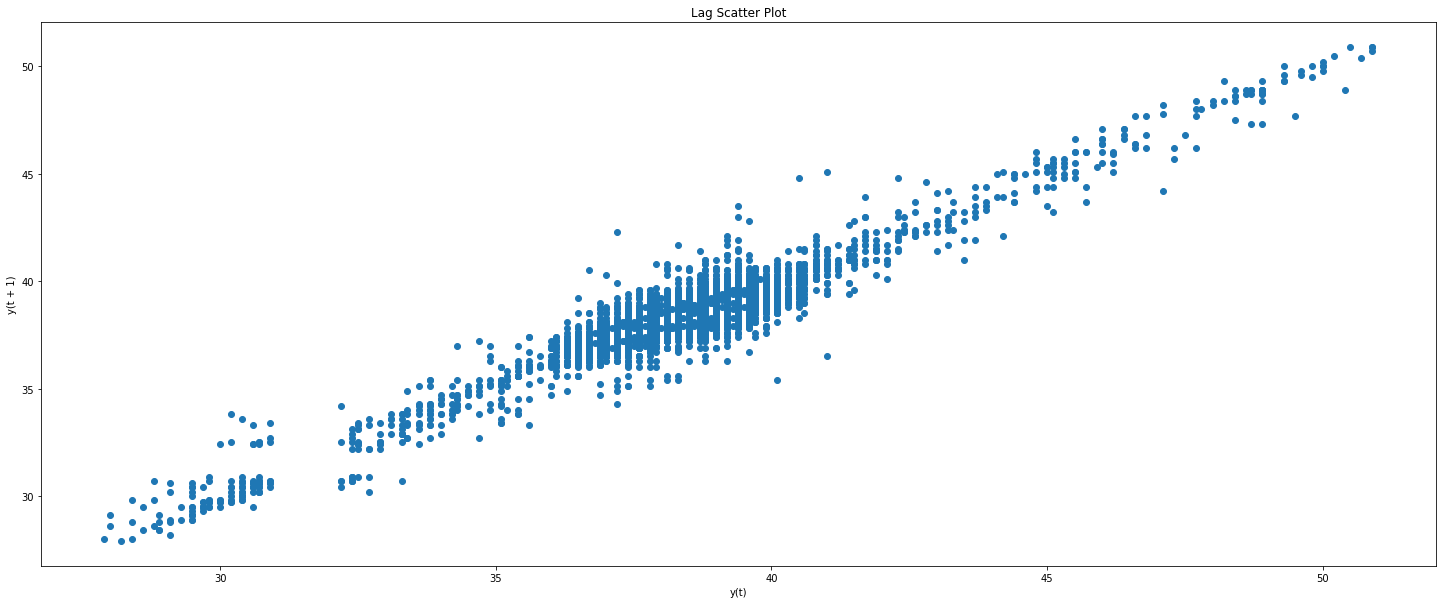

In [27]:
plt.figure(figsize=(25,10))
pd.plotting.lag_plot(janef, lag=1)
plt.title('Lag Scatter Plot')
plt.show()

# Data Visualization 

In [28]:
df_names = [Nov, Dec, Jan, Feb]
months = ['nov', 'dec', 'jan', 'feb']
Data = pd.DataFrame(columns = ['Time','Temperature'])

for month, name in zip(months,df_names):
    print(month)
    print(name.shape)
    month = name.groupby(pd.Grouper(freq='1Min'))
    new_df = pd.DataFrame(columns = ['Time','Temperature'])
    for name, group in month:
        if (len(group.values.flatten()) == 0):
            new_df = new_df.append({'Time':name,'Temperature':np.nan}, ignore_index=True)
        else:
            new_df = new_df.append({'Time':name,'Temperature':group.values.flatten()[0]}, ignore_index=True)
    #data_full has the continuous data with nan values            
    Data = pd.concat([Data, new_df], sort=False, ignore_index=True)

nov
(34226, 1)
dec
(25488, 1)
jan
(35364, 1)
feb
(8008, 1)


In [0]:
Data.set_index('Time', drop=True, append=False, inplace=True, verify_integrity=False)

In [30]:
Data.shape

(133927, 1)

In [31]:
Data.sample(5)

,Temperature
Time,
2019-12-30 21:23:00,37.8
2019-12-04 04:19:00,NaN
2019-12-02 00:56:00,NaN
2019-11-16 19:09:00,39.9
2019-12-28 09:01:00,37.4


In [32]:
#We see that we have 30841 null values
Data.isna().sum()

Temperature    30841
dtype: int64

In [0]:
#Impute missing values in numeric columns using kNN Imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=15, weights="uniform")
imputed_values = imputer.fit_transform(Data)

In [34]:
#convert the numeric columns after imputation to a dataframe
#data_imputed is complete datset imputed with KNN imputation values
data_imputed = pd.DataFrame(imputed_values, columns=['Temperature'])
data_imputed.index = Data.index
print(data_imputed.shape)
data_imputed.head()

(133927, 1)


,Temperature
Time,
2019-11-04 16:50:00,67.5
2019-11-04 16:51:00,67.3
2019-11-04 16:52:00,67.3
2019-11-04 16:53:00,67.3
2019-11-04 16:54:00,67.2


In [35]:
data_imputed.index

DatetimeIndex(['2019-11-04 16:50:00', '2019-11-04 16:51:00',
               '2019-11-04 16:52:00', '2019-11-04 16:53:00',
               '2019-11-04 16:54:00', '2019-11-04 16:55:00',
               '2019-11-04 16:56:00', '2019-11-04 16:57:00',
               '2019-11-04 16:58:00', '2019-11-04 16:59:00',
               ...
               '2020-02-06 13:51:00', '2020-02-06 13:52:00',
               '2020-02-06 13:53:00', '2020-02-06 13:54:00',
               '2020-02-06 13:55:00', '2020-02-06 13:56:00',
               '2020-02-06 13:57:00', '2020-02-06 13:58:00',
               '2020-02-06 13:59:00', '2020-02-06 14:00:00'],
              dtype='datetime64[ns]', name='Time', length=133927, freq=None)

In [0]:
Data = data_imputed

In [37]:
#We see that we have 0 null values
Data.isna().sum()

Temperature    0
dtype: int64

In [0]:
#Data = pd.concat([Nov,Dec,Jan,Feb])
Dataef = pd.concat([novef,decef,janef])

In [39]:
Data.columns

Index(['Temperature'], dtype='object')

In [40]:
Dataef.columns

Index(['Temp'], dtype='object')

In [41]:
Data.head(10)

,Temperature
Time,
2019-11-04 16:50:00,67.5
2019-11-04 16:51:00,67.3
2019-11-04 16:52:00,67.3
2019-11-04 16:53:00,67.3
2019-11-04 16:54:00,67.2
2019-11-04 16:55:00,67.6
2019-11-04 16:56:00,67.8
2019-11-04 16:57:00,67.9
2019-11-04 16:58:00,67.9


In [42]:
Dataef.head(10)

,Temp
Dt,
2019-12-01 00:00:00,39.0
2019-12-01 00:01:00,39.2
2019-12-01 00:02:00,39.4
2019-12-01 00:03:00,39.2
2019-12-01 00:05:00,37.9
2019-12-01 00:06:00,37.6
2019-12-01 00:07:00,37.4
2019-12-01 00:08:00,37.0
2019-12-01 00:09:00,36.9


In [43]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133927 entries, 2019-11-04 16:50:00 to 2020-02-06 14:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Temperature  133927 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


In [44]:
Dataef.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129948 entries, 2019-12-01 00:00:00 to 2019-12-31 23:59:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Temp    129948 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


In [45]:
print(Data.head(5)) 
print(Data.tail(5))

                     Temperature
Time                            
2019-11-04 16:50:00         67.5
2019-11-04 16:51:00         67.3
2019-11-04 16:52:00         67.3
2019-11-04 16:53:00         67.3
2019-11-04 16:54:00         67.2
                     Temperature
Time                            
2020-02-06 13:56:00         40.6
2020-02-06 13:57:00         44.6
2020-02-06 13:58:00         48.4
2020-02-06 13:59:00         51.1
2020-02-06 14:00:00         53.8


In [46]:
print(Dataef.head(5))
print(Dataef.tail(5))

                     Temp
Dt                       
2019-12-01 00:00:00  39.0
2019-12-01 00:01:00  39.2
2019-12-01 00:02:00  39.4
2019-12-01 00:03:00  39.2
2019-12-01 00:05:00  37.9
                     Temp
Dt                       
2019-12-31 23:55:00  38.8
2019-12-31 23:56:00  39.0
2019-12-31 23:57:00  39.2
2019-12-31 23:58:00  39.4
2019-12-31 23:59:00  39.6


In [47]:
Data.isnull().sum()   # Checking for null values
Data.dtypes

Temperature    float64
dtype: object

In [0]:
Data['Temp'] = Data['Temperature']
Data.drop(['Temperature'],axis=1,inplace=True)

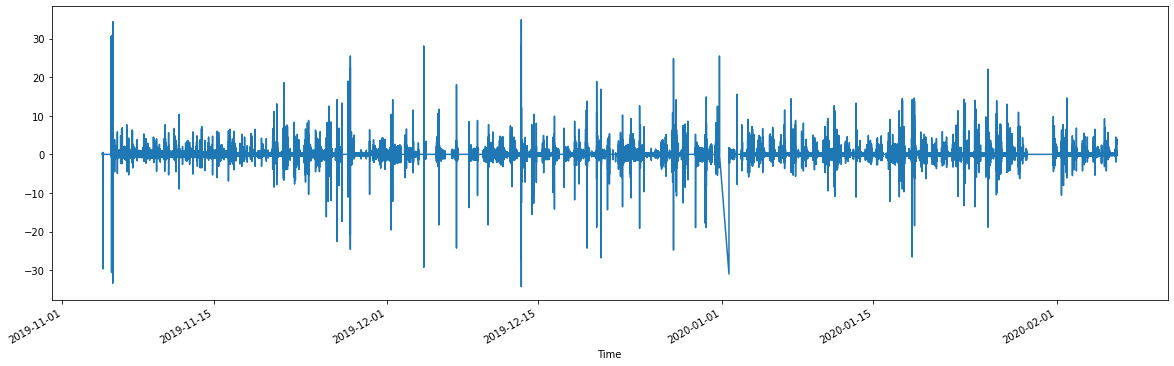

In [49]:
#Data["Temperature (F)"].asfreq('D').plot(legend=True)
Data['Temp'].diff().plot(figsize=(20,6))
# Similar to lag plot, for checking the stationarity.

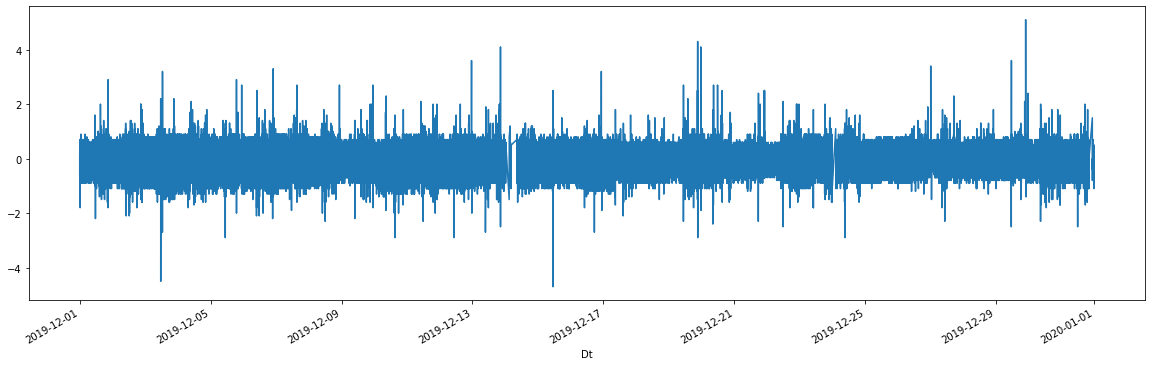

In [50]:
Dataef['Temp'].diff().plot(figsize = (20,6))

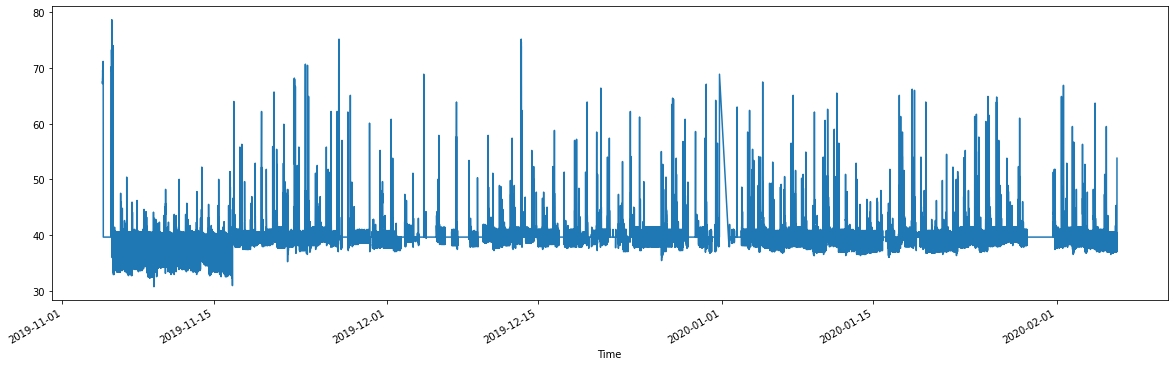

In [51]:
Data['Temp'].plot(figsize=(20,6))

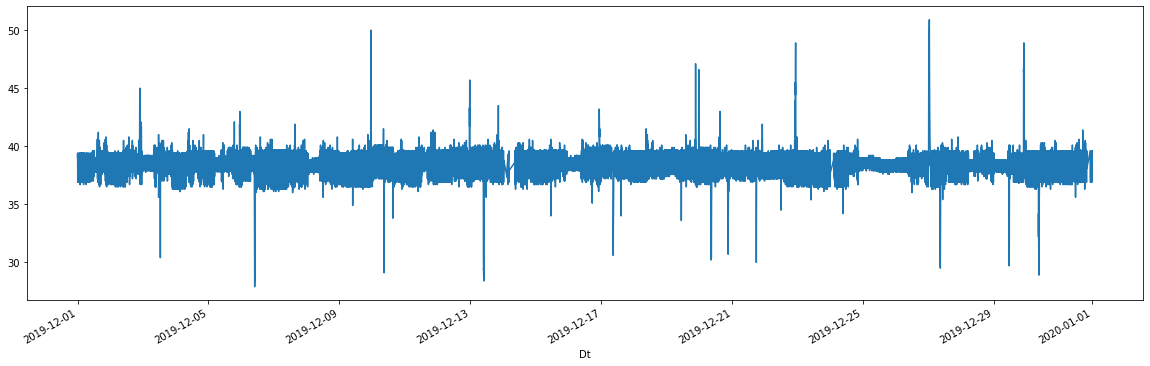

In [52]:
Dataef['Temp'].plot(figsize = (20,6))

# Verifying Trend, Seasonality and Stationarity

In [0]:
Data['Dt'] = Data.index
Dataef['Dt'] = Dataef.index

In [0]:
# For figuring out the missing values on each day, ideally we should have 1440 point a day on a 1minute average dataset
res = Data['Dt'].dt.normalize().value_counts().to_frame().reset_index()
# rename columns
res.columns = ['timestamp', 'count']

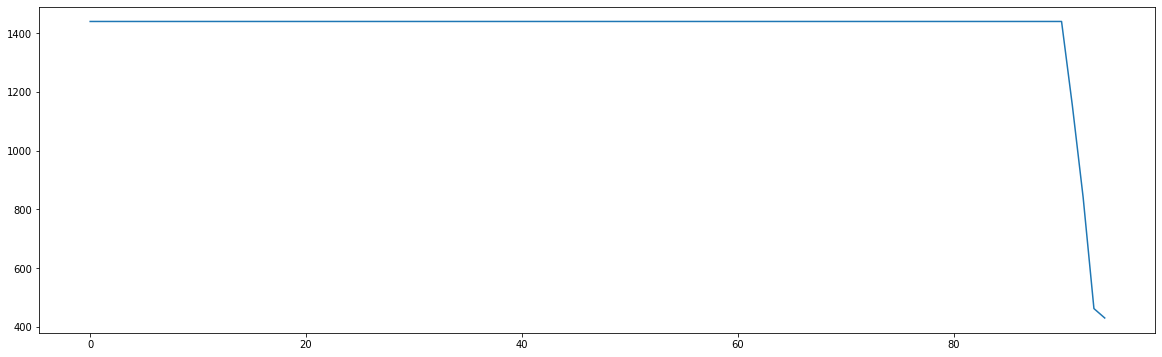

In [55]:
res['count'].plot(figsize=(20,6))

# Trend,Seasonality, Stationarity for Extra_Fridge Dataset

In [56]:
Dataef.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129948 entries, 2019-12-01 00:00:00 to 2019-12-31 23:59:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Temp    129948 non-null  float64       
 1   Dt      129948 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 MB


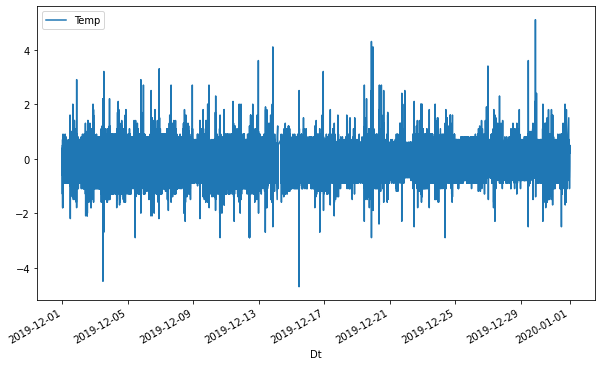

In [57]:
Dataef.drop(['Dt'],axis = 1,inplace = True)
Dataef.diff().plot()
# We can see that the diff() is quite stationary with time with confined variance 

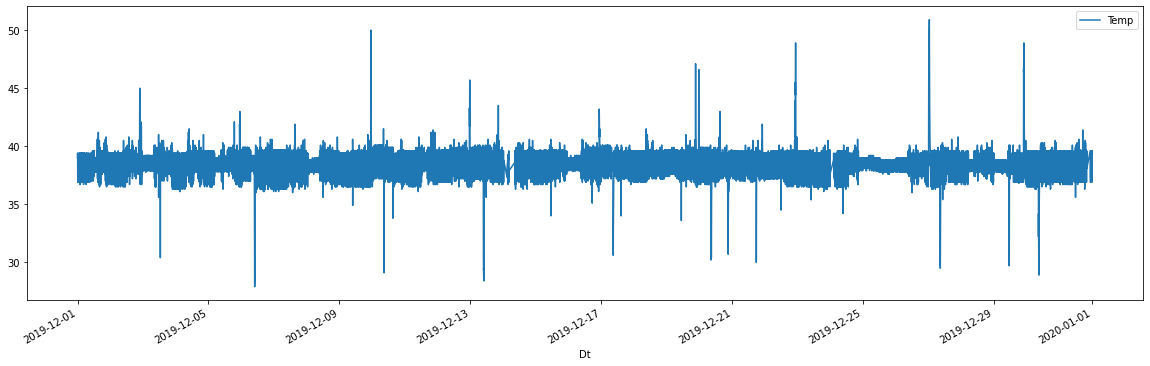

In [58]:
Dataef.plot(figsize = (20,6))

In [0]:
Dataef['Dt'] = Dataef.index

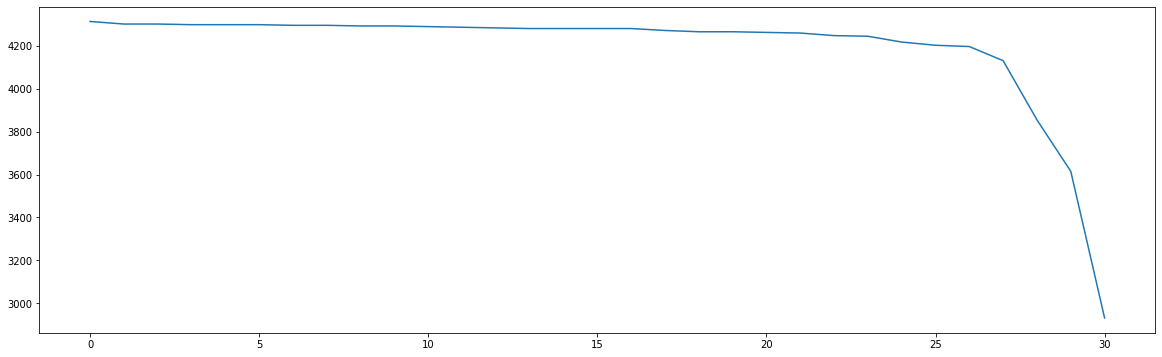

In [60]:
# Verifying the completeness of dataset
resef = Dataef['Dt'].dt.normalize().value_counts().to_frame().reset_index()
resef.columns = ['timestamp','count']
resef['count'].plot(figsize=(20,6))
# We can say, that we have almost quite complete data for the three months

In [61]:
Dataef.isnull().sum()

Temp    0
Dt      0
dtype: int64

In [0]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
Dataef.drop(['Dt'],axis = 1,inplace = True)

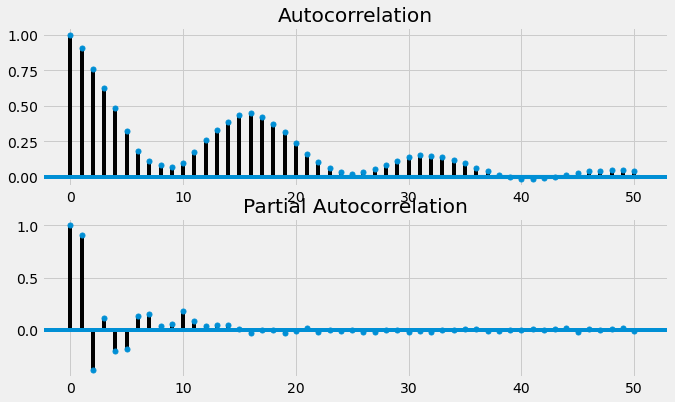

In [64]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(Dataef, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(Dataef, lags=50, ax=ax[1])
plt.show()
# We do not having very significant autocorrelation for 30 lags. but we do have correlation greater than 0.8 upto 3 lags.
# But we can say that we cannot completely use the historic data to predict the lag data

In [65]:
Dataef.describe()

,Temp
count,129948.000000
mean,38.360114
std,1.125161
min,27.900000
25%,37.800000
50%,38.500000
75%,39.000000
max,50.900000


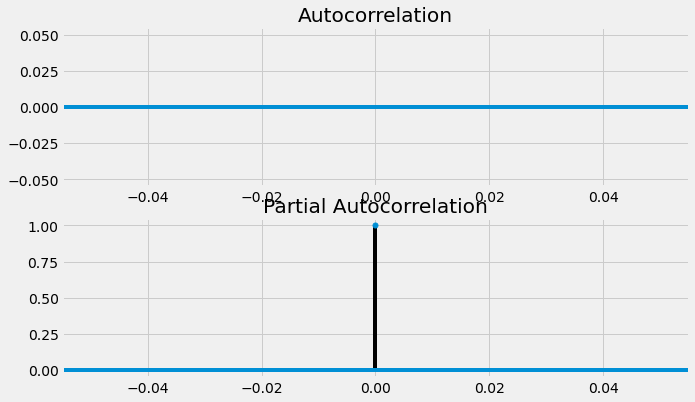

In [66]:
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(Dataef.diff(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(Dataef.diff(), lags=50, ax=ax[1])
plt.show()

In [67]:
# Ljung- Box test, for verifying, if the series is white noise or not.
# Null Hypothesis: There is not autocorrelation between the signal and its lagged versions. (Does not have white noise)
# Alternate Hypothesis: There is autocorrelation between the signal and its lagged versions. (Has white noise)
lb_statistic, lb_pvalue= ljungbox(Dataef,range(1,30)) # We are checking for upto 30 lags, with confidence of 90percent.
print(' Lag  Statistic  p-value')
for i in range(len(lb_statistic)):
  print("%-2d  %10.3f  %10.3f" %(i+1,lb_statistic[i],lb_pvalue[i]))
# So we can infer that the given timeseries is not white noise as the p-value is close to zero and Statistic is greater than critical value.
# We can reject the null hypothesis and accept that the given series is not white noise. 
# Also, as their is weak correlation for 50lags in autocorrelation, we can say that the data is not white noise

 Lag  Statistic  p-value
1   107286.370       0.000
2   182060.715       0.000
3   232315.177       0.000
4   262669.505       0.000
5   276179.645       0.000
6   280677.121       0.000
7   282320.658       0.000
8   283172.234       0.000
9   283797.992       0.000
10  285128.396       0.000
11  289209.943       0.000
12  298037.775       0.000
13  312091.784       0.000
14  331753.145       0.000
15  356590.540       0.000
16  382708.649       0.000
17  405605.448       0.000
18  423642.671       0.000
19  436404.478       0.000
20  443828.386       0.000
21  447275.084       0.000
22  448622.023       0.000
23  449091.397       0.000
24  449225.439       0.000
25  449290.271       0.000
26  449436.424       0.000
27  449845.312       0.000
28  450719.663       0.000
29  452314.837       0.000


In [68]:
# Using KPSS test for checking stationarity of Data
# Null hypothesis is (if p-value is greater than 0.05) Data is Stationary (trend) or deterministic
# Alternative hypothesis is Data is not having deterministic trend stationarity
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(Dataef['Temp'])
# As we can accept the alternative hypothesis, the data is not having trend stationarity. So its quite difficult to model the time series.

KPSS Statistic: 0.18581174514875312
p-value: 0.1
num lags: 73
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [69]:
# Using Adfuller test for testing staionarity of data
# Null Hypothesis is Data is not stationary(difference)
# Alternate Hypothesis is Data is stationary(difference)
# Generally is p-value is greater than 0.05 we accept the Null Hypothesis.
# ADF mainly test that Null: Not have differencing stationarity or stochastic stationarity, and Alternate Data has stochastic stationarity.
# We can apply the box-jenkins model in dealing with stochastic stationary data.
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    print(f'Result: The series is {" " if result[1] < 0.05 else "not"}stationary')
    print('We reject the Null Hypothesis as p-value is greater than 0.05 and ADF statistic is less than critical value')
adf_test(Dataef['Temp'])

ADF Statistic: -35.14003232794441
p-value: 0.0
Critial Values:
   1%, -3.4304003521047557
Critial Values:
   5%, -2.8615622548978488
Critial Values:
   10%, -2.566781845493545
Result: The series is  stationary
We reject the Null Hypothesis as p-value is greater than 0.05 and ADF statistic is less than critical value


In [0]:
# Lets convert the 'Dataef' into its log form
Dataeflog = np.log(Dataef)

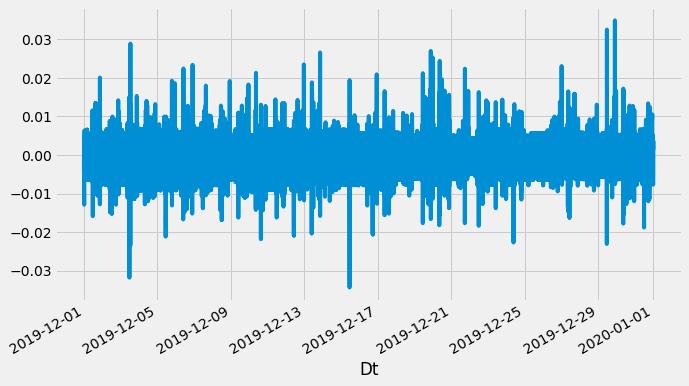

In [71]:
#A major difference between KPSS and ADF tests is the capability of the KPSS test to check for stationarity in the 
#‘presence of a deterministic trend’.
# According to our results, we see that data is stationary according to ADF and not stationary according to KPSS.
# So, we are dealing with a stochastic stationary trend, with random shocks in data
# So we need to use differencing to make the data stationary and log transform
Dataeflog['Temp'] = np.log(Dataeflog['Temp'])
Dataeflog['TempDiff'] = Dataeflog['Temp'] - Dataeflog['Temp'].shift(1)
Dataeflog['TempDiff'].dropna().plot()
# We can see now that data is quite stationary
# Lets apply different tests.

In [72]:
# Using KPSS test for checking stationarity of Data of log version difference.
# Null hypothesis is (if p-value is greater than 0.05) Data is Stationary (trend) or deterministic
# Alternative hypothesis is Data is not having deterministic trend stationarity
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(Dataeflog['TempDiff'])
# As we can accept the Null hypothesis in this case, we can say the diff between data is showing deterministic stationarity.

KPSS Statistic: nan
p-value: nan
num lags: 73
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


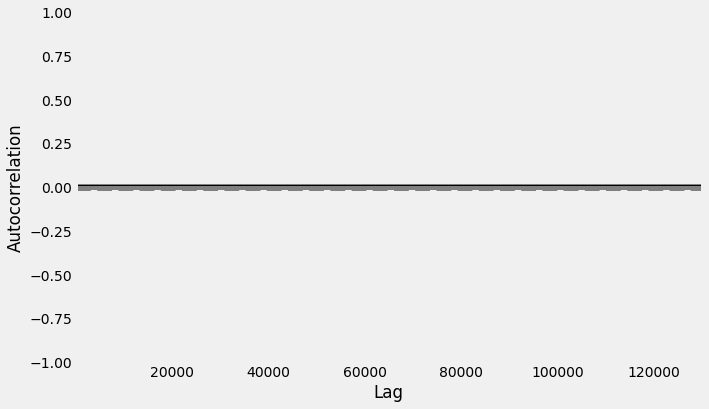

In [73]:
# Checking for autocorrelation in dataset
pd.plotting.autocorrelation_plot(Dataeflog['TempDiff'])

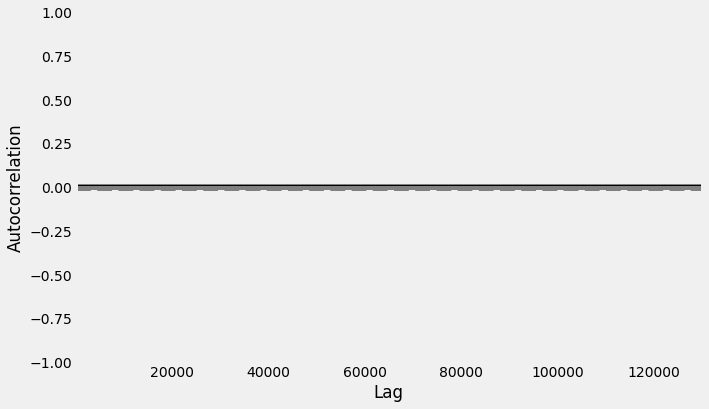

In [74]:
# Checking for autocorrelation in actual dataset difference 
Dataef['TempDiff'] = Dataef['Temp'] - Dataef['Temp'].shift()
pd.plotting.autocorrelation_plot(Dataef['TempDiff'])
# Their is no correlation between the previous lag's so we cannot use the error term.

Dt
2019-12-01    38.256755
2019-12-02    38.433077
2019-12-03    38.511370
2019-12-04    38.288339
2019-12-05    38.447468
2019-12-06    38.183170
2019-12-07    38.263687
2019-12-08    38.297484
2019-12-09    38.167341
2019-12-10    38.565178
2019-12-11    38.463451
2019-12-12    38.560322
2019-12-13    38.299790
Freq: D, Name: Temp, dtype: float64


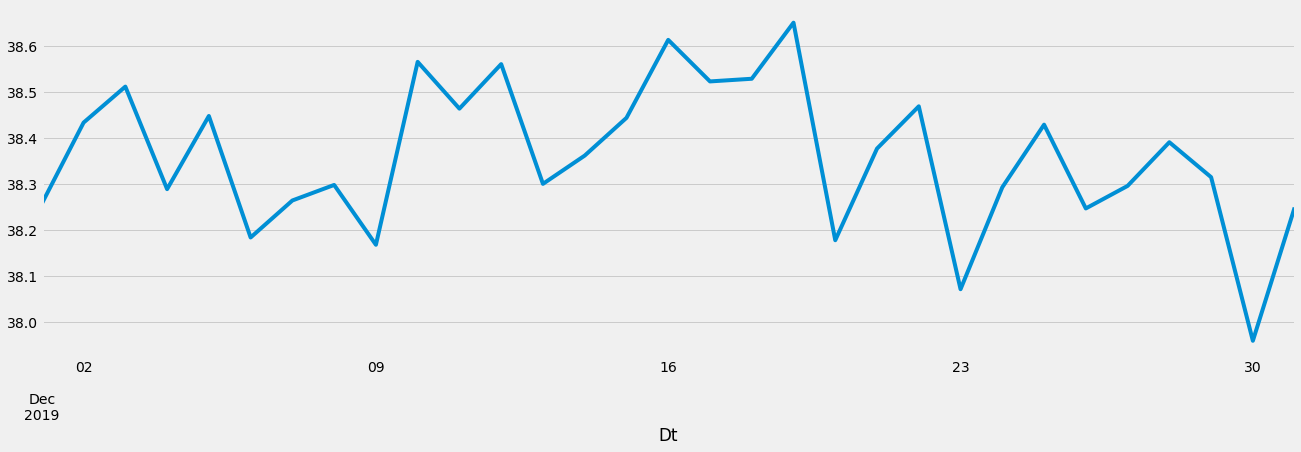

In [75]:
# Verifying seasonality of data, All months Daily average seasonality check
resample = Dataef['Temp'].resample('D')
Daily_mean = resample.mean()
print(Daily_mean.head(13))
Daily_mean.plot(figsize=(20,6))

Dt
2019-12-01 00:00:00    37.974286
2019-12-01 01:00:00    38.229310
2019-12-01 02:00:00    38.145000
2019-12-01 03:00:00    38.088136
2019-12-01 04:00:00    38.130508
2019-12-01 05:00:00    38.139655
2019-12-01 06:00:00    38.078333
2019-12-01 07:00:00    38.129310
2019-12-01 08:00:00    38.140678
2019-12-01 09:00:00    38.257627
2019-12-01 10:00:00    38.340678
2019-12-01 11:00:00    38.413333
2019-12-01 12:00:00    38.520339
Freq: H, Name: Temp, dtype: float64


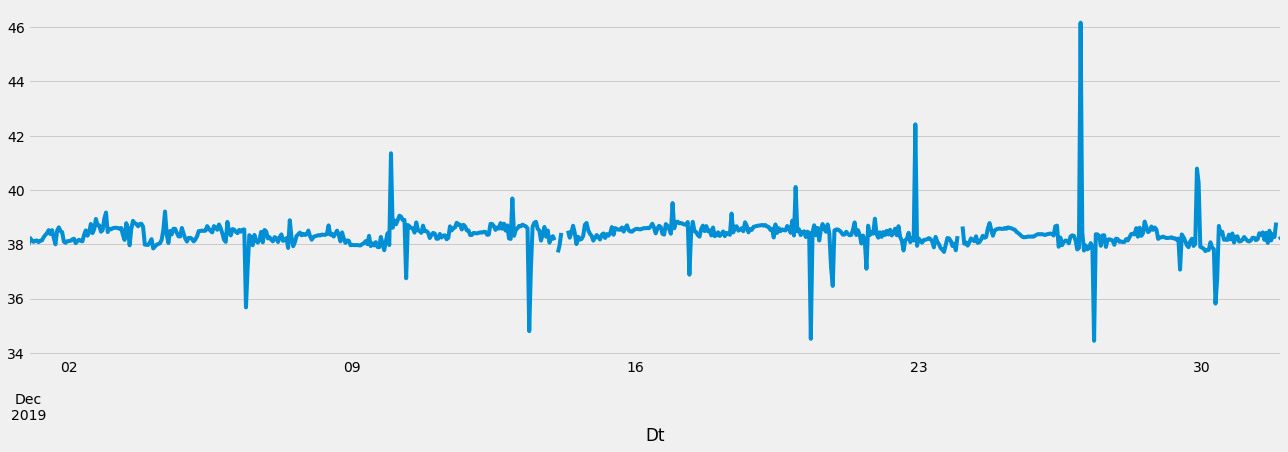

In [76]:

# Verifying seasonality of data, All months Daily average seasonality check
resample = Dataef['Temp'].resample('H')
Hourly_mean = resample.mean()
print(Hourly_mean.head(13))
Hourly_mean.plot(figsize=(20,6))

# Arima Model

In [77]:
#Determine rolling statistics
rolmean = Data.rolling(window=60).mean() #window size 12 denotes 12 minutes, 1440 is total number of minutes of the entire day
rolstd = Data.rolling(window=60).std()
print(rolmean,rolstd)
# At 1 or 5 minute average their seems to be lack of stationarity in data, so lets predict the moving average of 60 mins.

                          Temp
Time                          
2019-11-04 16:50:00        NaN
2019-11-04 16:51:00        NaN
2019-11-04 16:52:00        NaN
2019-11-04 16:53:00        NaN
2019-11-04 16:54:00        NaN
...                        ...
2020-02-06 13:56:00  38.568333
2020-02-06 13:57:00  38.651667
2020-02-06 13:58:00  38.796667
2020-02-06 13:59:00  38.983333
2020-02-06 14:00:00  39.211667

[133927 rows x 1 columns]                          Temp
Time                         
2019-11-04 16:50:00       NaN
2019-11-04 16:51:00       NaN
2019-11-04 16:52:00       NaN
2019-11-04 16:53:00       NaN
2019-11-04 16:54:00       NaN
...                       ...
2020-02-06 13:56:00  1.085574
2020-02-06 13:57:00  1.330412
2020-02-06 13:58:00  1.827749
2020-02-06 13:59:00  2.418724
2020-02-06 14:00:00  3.081717

[133927 rows x 1 columns]


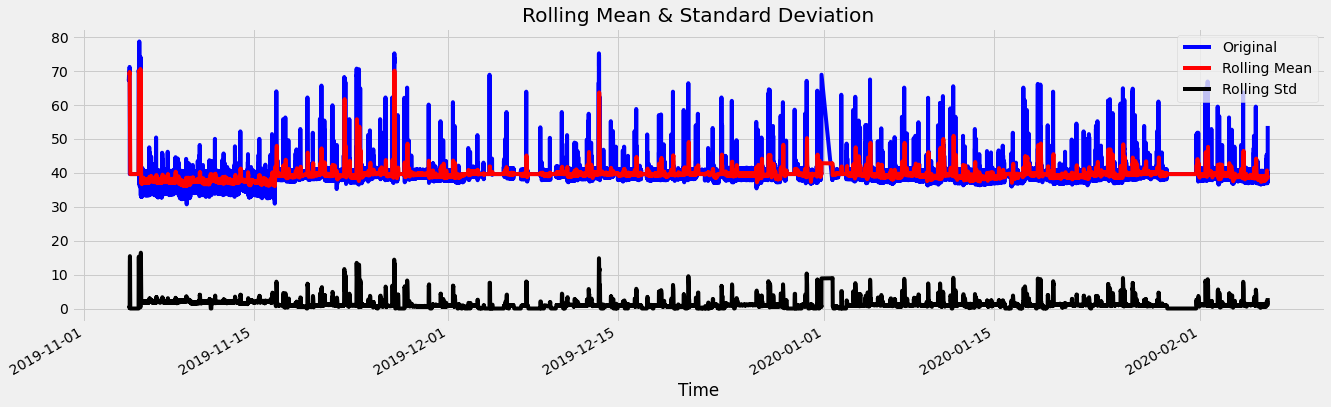

In [78]:
from matplotlib import pyplot as plt
#Plot rolling statistics
orig = Data['Temp'].plot(figsize=(20,6),color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# We can understand that our rolling mean and rolling std are not following a trend and are in sync with time series temperature data

In [79]:
#Perform Augmented Dickey–Fuller test, to check the stationarity
print('Results of Dickey Fuller Test:')
dftest = adfuller(Data['Temp'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)
'''
For a Time series to be stationary, its ADCF test should have:

1) p-value to be low (according to the null hypothesis) #Null hypothesis is the Data has Stationarity, Alternate Hypothesis is Data is not having Stationarity.
2) The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

From the above ADCF test result, we see that p-value(at max can be 1.0) is very small in our case. Also critical values 
are greater than the Test Statistics. Hence, we can safely say that our Time Series at the moment is  stationary but stochastic in nature '''

Results of Dickey Fuller Test:
Test Statistic                    -30.497608
p-value                             0.000000
#Lags Used                         73.000000
Number of Observations Used    133853.000000
Critical Value (1%)                -3.430399
Critical Value (5%)                -2.861562
Critical Value (10%)               -2.566781
dtype: float64


'\nFor a Time series to be stationary, its ADCF test should have:\n\n1) p-value to be low (according to the null hypothesis) #Null hypothesis is the Data has Stationarity, Alternate Hypothesis is Data is not having Stationarity.\n2) The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics\n\nFrom the above ADCF test result, we see that p-value(at max can be 1.0) is very small in our case. Also critical values \nare greater than the Test Statistics. Hence, we can safely say that our Time Series at the moment is  stationary but stochastic in nature '

In [80]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133927 entries, 2019-11-04 16:50:00 to 2020-02-06 14:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Temp    133927 non-null  float64       
 1   Dt      133927 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 MB


In [0]:

Data.drop(['Dt'],inplace=True,axis =1)

In [82]:
# Lets convert it to log scale
Datalog = np.log(Data)
Datalog.head()

,Temp
Time,
2019-11-04 16:50:00,4.212128
2019-11-04 16:51:00,4.209160
2019-11-04 16:52:00,4.209160
2019-11-04 16:53:00,4.209160
2019-11-04 16:54:00,4.207673


In [0]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=5).mean()
    movingSTD = timeseries.rolling(window=5).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
#   std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Temp'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    print(f'Result: The series is {" " if dftest[1] < 0.05 else "not"}stationary')

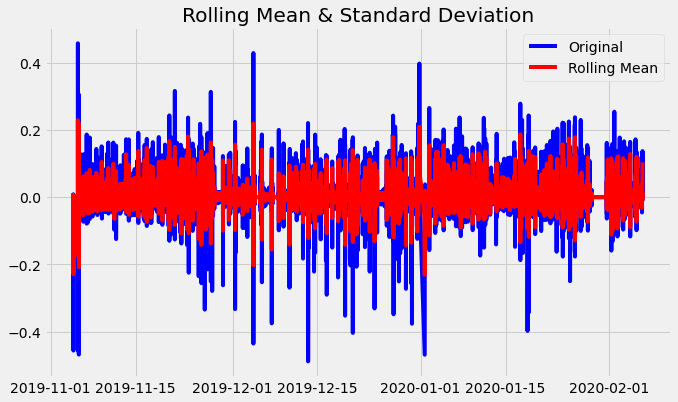

Results of Dickey Fuller Test:
Test Statistic                    -58.445280
p-value                             0.000000
#Lags Used                         73.000000
Number of Observations Used    133849.000000
Critical Value (1%)                -3.430399
Critical Value (5%)                -2.861562
Critical Value (10%)               -2.566781
dtype: float64
Result: The series is  stationary


In [84]:
rolling_mean = Datalog.rolling(window=5).mean()
df_log_minus_mean = Datalog - rolling_mean
df_log_minus_mean.dropna(inplace=True)
test_stationarity(df_log_minus_mean)


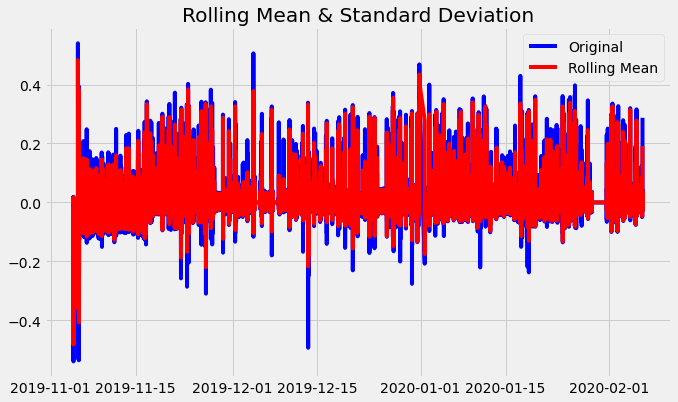

Results of Dickey Fuller Test:
Test Statistic                    -52.028713
p-value                             0.000000
#Lags Used                         73.000000
Number of Observations Used    133853.000000
Critical Value (1%)                -3.430399
Critical Value (5%)                -2.861562
Critical Value (10%)               -2.566781
dtype: float64
Result: The series is  stationary


In [85]:
rolling_mean_exp_decay = Datalog.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = Datalog - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
test_stationarity(df_log_exp_decay)

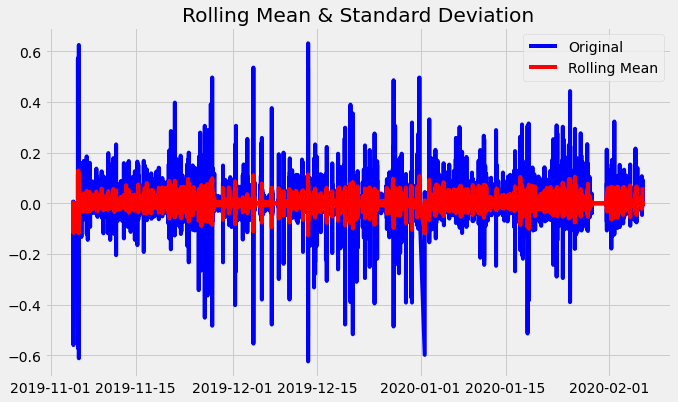

Results of Dickey Fuller Test:
Test Statistic                    -58.620907
p-value                             0.000000
#Lags Used                         73.000000
Number of Observations Used    133852.000000
Critical Value (1%)                -3.430399
Critical Value (5%)                -2.861562
Critical Value (10%)               -2.566781
dtype: float64
Result: The series is  stationary


In [86]:
df_log_shift = Datalog - Datalog.shift()
df_log_shift.dropna(inplace=True)
test_stationarity(df_log_shift)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


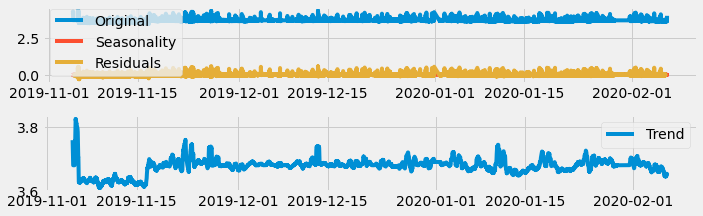

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Datalog,freq=720) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Datalog, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
#test_stationarity(decomposedLogData)

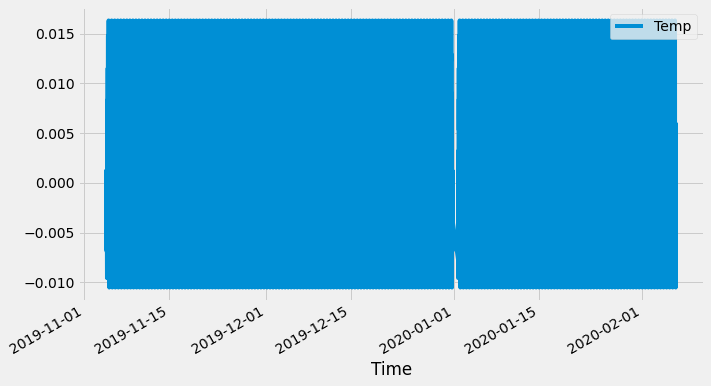

In [88]:
decomposition.seasonal.plot()

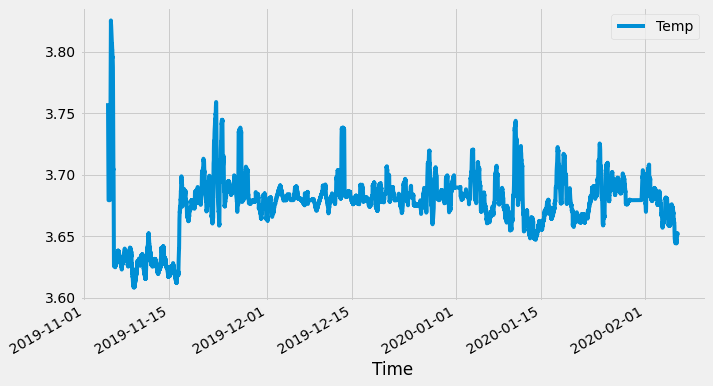

In [89]:
decomposition.trend.plot()

In [0]:
# AutoRegressive Model (AR)
# Autoregressive models operate under the premise that past values have an effect on current values. AR models are commonly used 
# in analyzing nature, economics, and other time-varying processes. As long as the assumption holds, we can build a linear regression 
# model that attempts to predict value of a dependent variable today, given the values it had on previous days.

# Moving Average Model (MA)
# Assumes the value of the dependent variable on the current datetime depends on the previous datetime error terms.

# Auto Regressive Moving Average (ARMA)
# The ARMA model is simply the combination of the AR and MA models.

# AutoRegressive Integrated Moving Average Model (ARIMA)
# The ARIMA (aka Box-Jenkins) model adds differencing to an ARMA model. Differencing subtracts the current value from the 
# previous and can be used to transform a time series into one that’s stationary. For example, first-order differencing addresses 
# linear trends, and employs the transformation zi = yi — yi-1. Second-order differencing addresses quadratic trends and employs 
# a first-order difference of a first-order difference, namely zi = (yi — yi-1) — (yi-1 — yi-2), and so on.

#Three integers (p, d, q) are typically used to parametrize ARIMA models.
#p: number of autoregressive terms (AR order)
#d: number of nonseasonal differences (differencing order)
#q: number of moving-average terms (MA order)

In [0]:
# Auto Correlation Function (ACF)
# The correlation between the observations at the current point in time and the observations at all previous points in time.
# We can use ACF to determine the optimal number of MA terms. The number of terms determines the order of the model.

# Partial Auto Correlation Function (PACF)
# As the name implies, PACF is a subset of ACF. PACF expresses the correlation between observations made at two points in time 
# while accounting for any influence from other data points. We can use PACF to determine the optimal number of terms to use in 
# the AR model. The number of terms determines the order of the model.

# If the series has a tendency, it will be necessary to use the ARIMA model.
# ARIMA is used for non-stationary series. In this model, a differentiation step I (d) is used to eliminate non-stationarity.
# The integrated element “I” for differentiation allows the method to support time series with trend. But still this model does not identify seasonality.



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


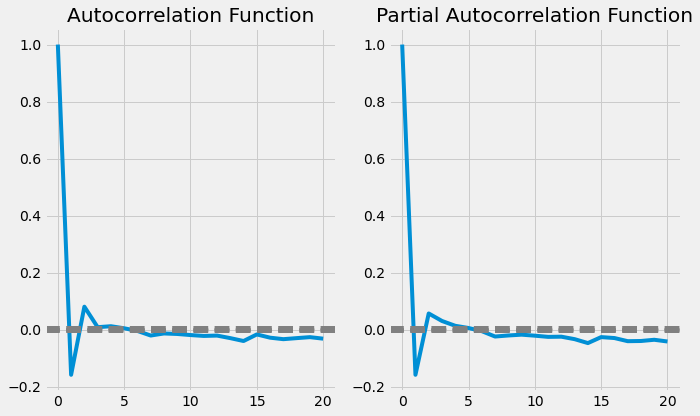

In [92]:
# Plotting ACF & PCF
lag_acf = acf(df_log_shift, nlags=20)
lag_pacf = pacf(df_log_shift, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


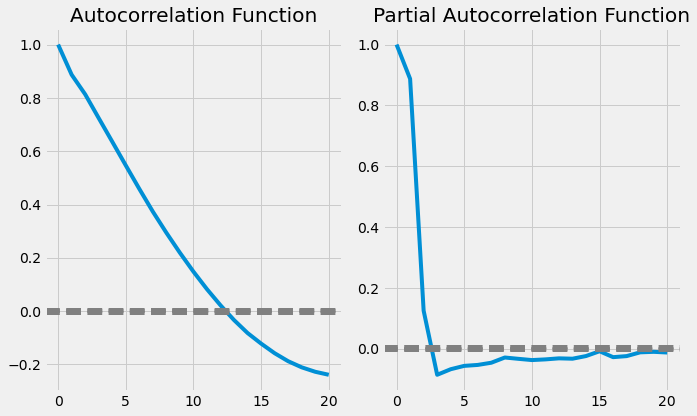

In [93]:
# Plotting ACF & PCF
lag_acf = acf(df_log_exp_decay, nlags=20)
lag_pacf = pacf(df_log_exp_decay, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_exp_decay)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_exp_decay)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_exp_decay)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_exp_decay)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


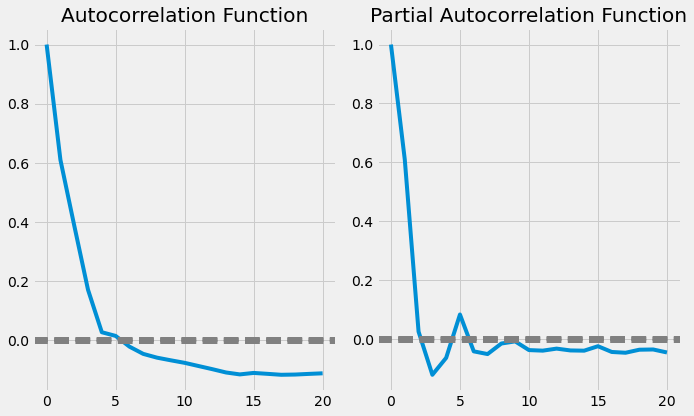

In [94]:
# Plotting ACF & PCF
lag_acf = acf(df_log_minus_mean, nlags=20)
lag_pacf = pacf(df_log_minus_mean, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_minus_mean)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_minus_mean)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_minus_mean)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_minus_mean)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

In [0]:
import itertools
from sklearn.metrics import mean_squared_error
import gc


In [0]:
Data_diff = Data.diff()

In [0]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3) #this is the range for the values
q_values = range(0, 3) #this is the range for the values

In [98]:
df_log_shift.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133926 entries, 2019-11-04 16:51:00 to 2020-02-06 14:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Temp    133926 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


In [0]:

# p_values = [0, 1, 2, 3, 4, 5]
# d_values = range(1, 2) #this is the range for the values
# q_values = range(0, 2) #this is the range for the values
# for p in p_values:
#   for d in d_values:
#     for q in q_values:
#       order = (p,d,q)
#       model = ARIMA(Datalog, order=(p,d,q))
#       results_ARIMA = model.fit(disp=-1)
#       rmse = (np.exp(sum((results_ARIMA.fittedvalues - df_log_shift['Temp'])**2)))/(len(df_log_shift))
#       print("Order, RMSE",order,rmse)
#       print('Arima with order ',order)
#       print('RSS: %.4f'%sum((results_ARIMA.fittedvalues - df_log_shift['Temp'])**2))

  

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting ARIMA model


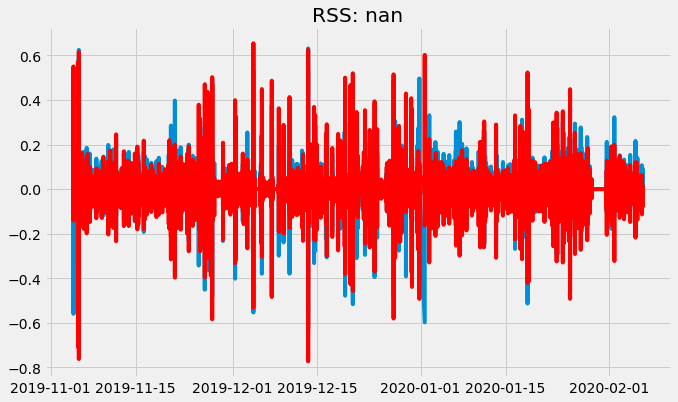

In [100]:
# AR+I+MA = ARIMA model
model = ARIMA(df_log_shift, order=(5,1,0))
results_ARIMA = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - df_log_shift['Temp'])**2))
print('Plotting ARIMA model')

In [0]:
# # AR+I+MA = ARIMA model
# model = ARIMA(df_log_minus_mean, order=(5,1,0))
# results_ARIMA = model.fit(disp=-1)
# plt.plot(df_log_minus_mean)
# plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - df_log_minus_mean['Temp'])**2))
# print('Plotting ARIMA model')

In [102]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Time
2019-11-04 16:52:00    4.493079e-07
2019-11-04 16:53:00   -1.788954e-03
2019-11-04 16:54:00   -1.069955e-03
2019-11-04 16:55:00    6.064778e-04
2019-11-04 16:56:00   -6.706072e-03
dtype: float64


In [103]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Time
2019-11-04 16:52:00    4.493079e-07
2019-11-04 16:53:00   -1.788505e-03
2019-11-04 16:54:00   -2.858460e-03
2019-11-04 16:55:00   -2.251982e-03
2019-11-04 16:56:00   -8.958054e-03
                           ...     
2020-02-06 13:56:00    2.145739e-01
2020-02-06 13:57:00    1.846602e-01
2020-02-06 13:58:00    1.039848e-01
2020-02-06 13:59:00    5.489666e-02
2020-02-06 14:00:00    4.582612e-02
Length: 133925, dtype: float64


In [104]:
predictions_ARIMA_log = pd.Series(Datalog['Temp'].iloc[0], index=Datalog.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Time
2019-11-04 16:50:00    4.212128
2019-11-04 16:51:00    4.212128
2019-11-04 16:52:00    4.212128
2019-11-04 16:53:00    4.210339
2019-11-04 16:54:00    4.209269
dtype: float64

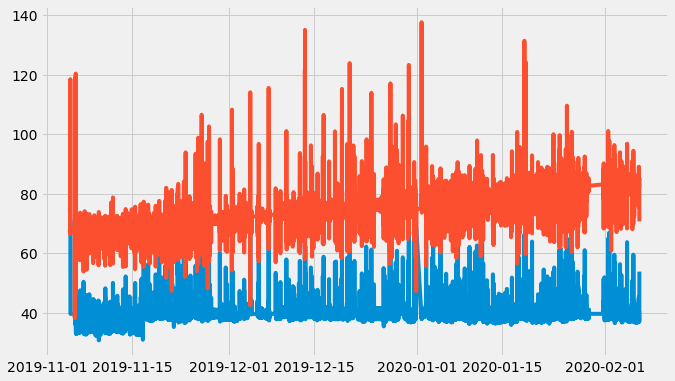

In [105]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log) 
plt.plot(Data)
plt.plot(predictions_ARIMA)

In [106]:
y_forecasted = predictions_ARIMA
y_truth = Data['Temp']
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 1320.62
The Root Mean Squared Error is 36.34


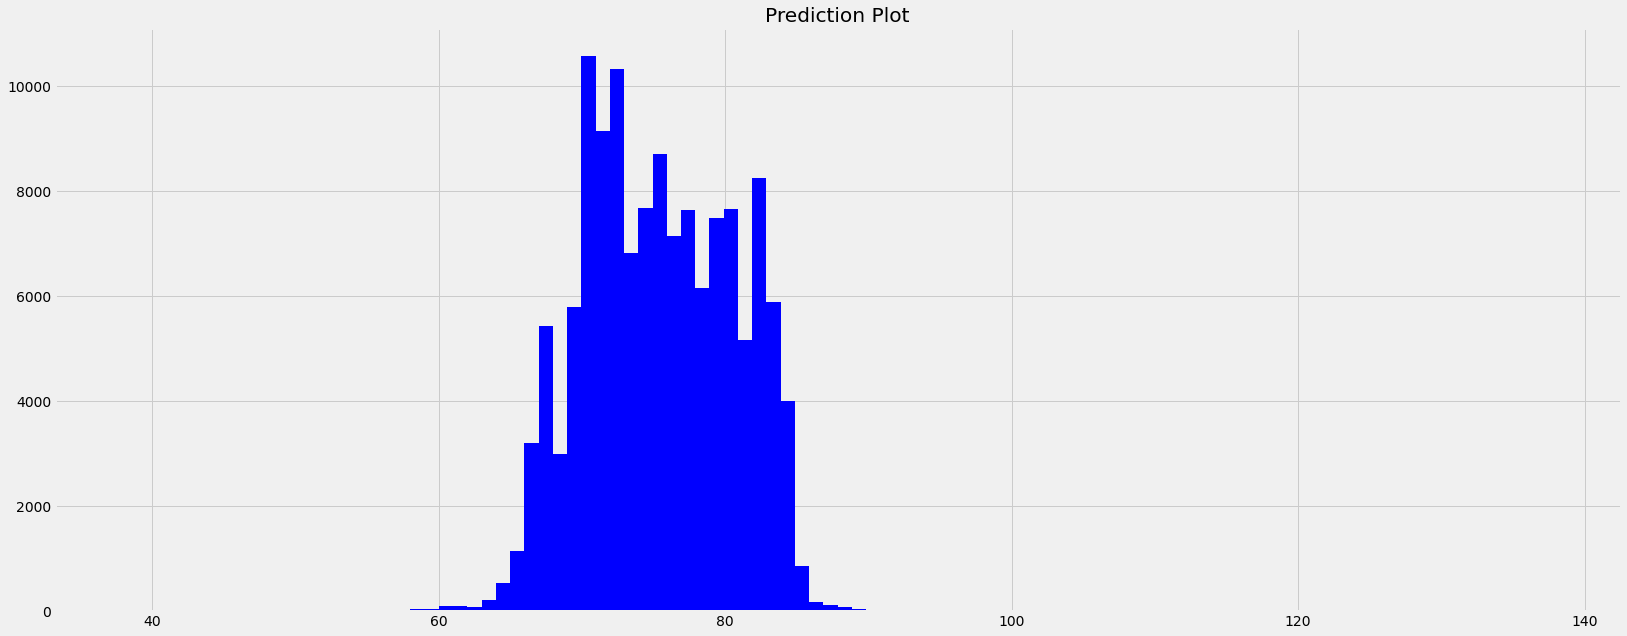

In [107]:
# Histogram 
predictions_ARIMA.hist(figsize=(25,10), bins=100, color='b')
plt.title('Prediction Plot')
plt.show()

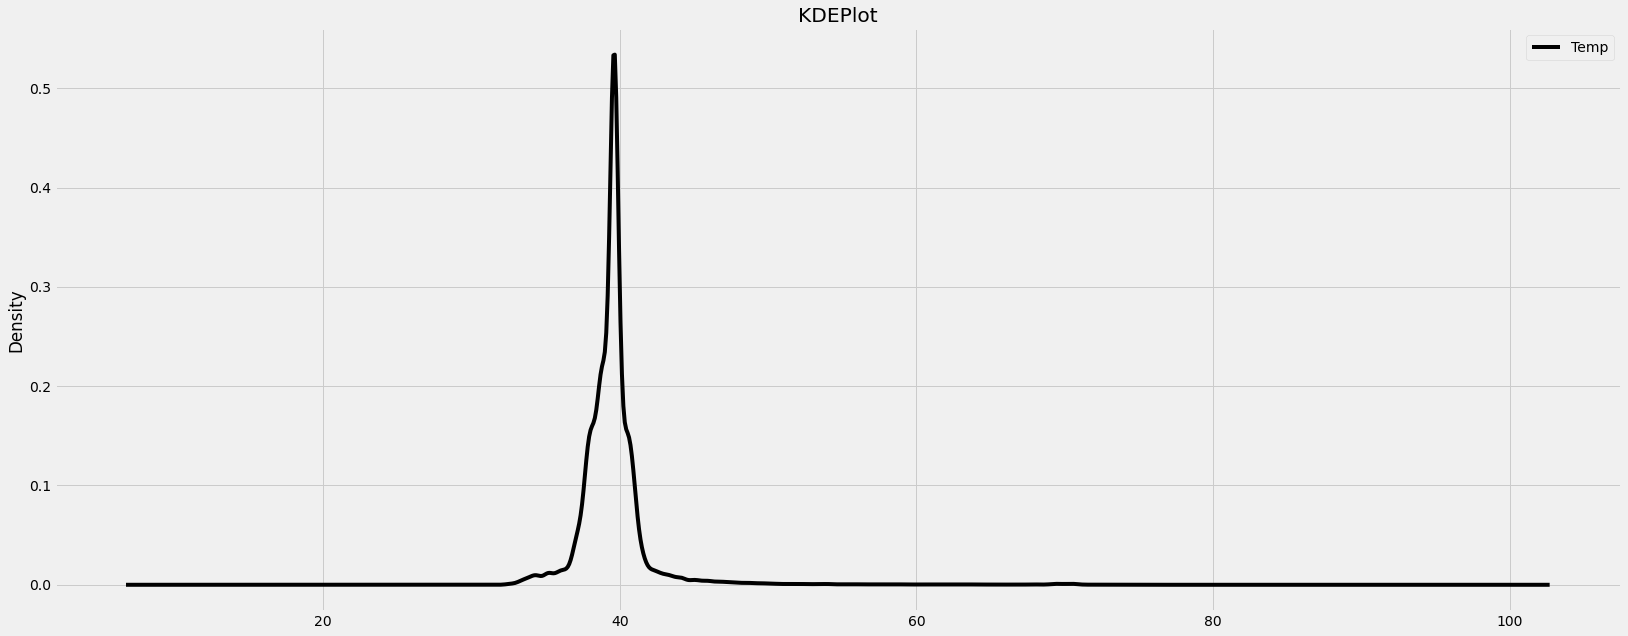

In [108]:
Data.plot(kind='kde', figsize=(25,10), title='KDEPlot', color = 'black')
plt.show()

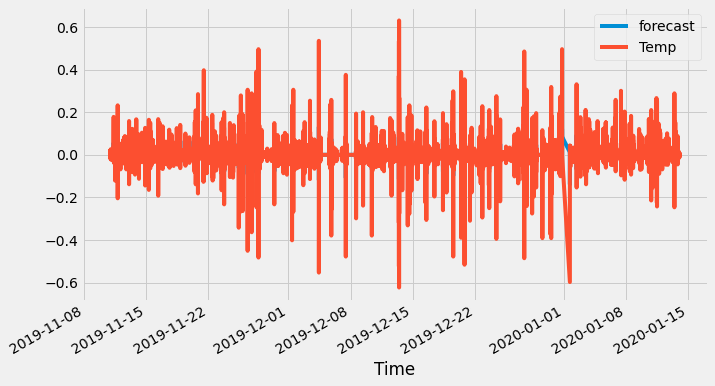

In [109]:
results_ARIMA.plot_predict(9000,100000) 
x=results_ARIMA.forecast(steps=100)
xexp = np.exp(x[1])

In [0]:
# Limitations of ARMIA
# 1) Not very effective in modelling the stochastic random component.
# 2) Computationally intensive.
# 3) Not efficient for modelling 

# Seasonal Arima

In [111]:
import itertools
import statsmodels.api as sm
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 1)
SARIMAX: (0, 0, 1) x (0, 0, 2, 1)
SARIMAX: (0, 0, 2) x (0, 1, 0, 1)
SARIMAX: (0, 0, 2) x (0, 1, 1, 1)


In [0]:
# According Peterson, T. (2014) the AIC (Akaike information criterion) is an estimator of the relative quality 
# of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of
# each model, relative to each of the other models. The low AIC value the better. 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            smodel = sm.tsa.statespace.SARIMAX(Data,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = smodel.fit()
            print('ARIMA{}x{}1 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

In [0]:
mod = sm.tsa.statespace.SARIMAX(Data['Temp'],
                                order=(5, 1, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

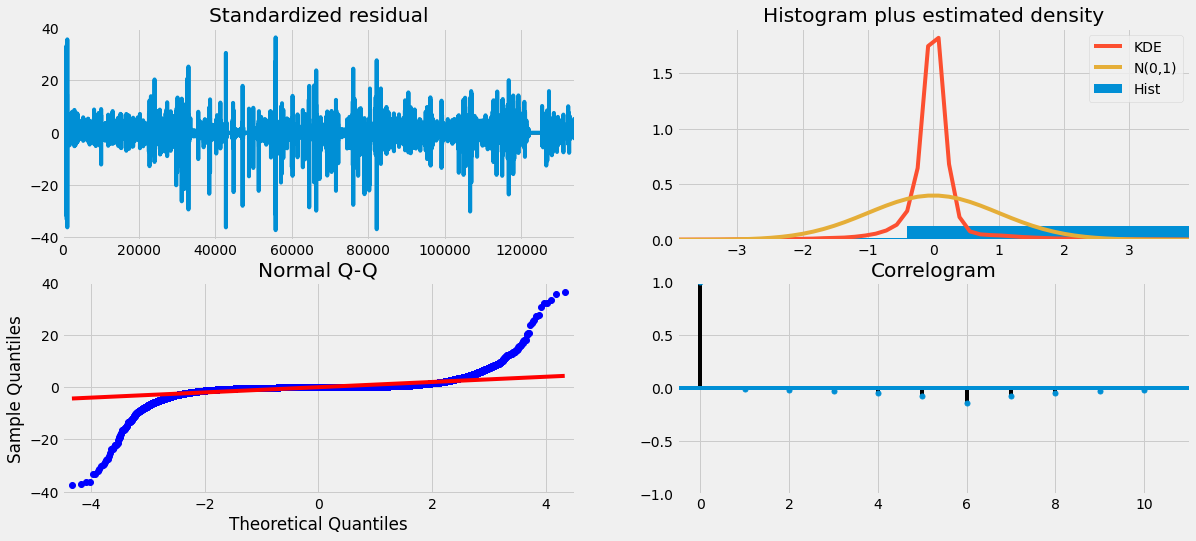

In [0]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

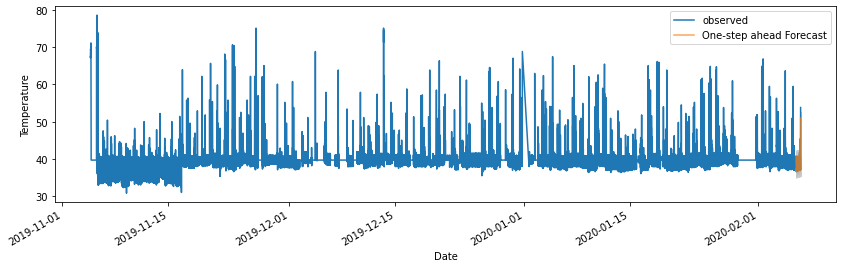

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2020-02-06'), dynamic=False)
pred_ci = pred.conf_int()
ax = Data['Temp'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend()
plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = Data['Temp']
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 0.19
The Root Mean Squared Error is 0.44


# Linear Regression

In [0]:
plt.figure(figsize=(25,10))
pd.plotting.lag_plot(Data, lag=1)
plt.title('Lag Scatter Plot')
plt.show()

In [0]:
plt.figure(figsize=(25,10))
pd.plotting.lag_plot(Dataef, lag=1)
plt.title('Lag Scatter Plot')
plt.show()

In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [0]:
forecast_out = 1 #'n=1' 1 minute delay
#Create another column (the target ) shifted 'n' units up
Data['Pre_temp_1'] = Data[['Temp']].shift(-forecast_out)
forecast_out = 5
Data['Pre_temp_5'] = Data['Temp'].shift(-forecast_out)
forecast_out = 10
Data['Pre_temp_10'] = Data['Temp'].shift(-forecast_out)
forecast_out = 15
Data['Pre_temp_15'] = Data['Temp'].shift(-forecast_out)
forecast_out = 30
Data['Pre_temp_30'] = Data['Temp'].shift(-forecast_out)
forecast_out = 45
Data['Pre_temp_45'] = Data['Temp'].shift(-forecast_out)
forecast_out = 60
Data['Pre_temp_60'] = Data['Temp'].shift(-forecast_out)

In [0]:
forecast_out = 1 #'n=1' 1 minute delay
#Create another column (the target ) shifted 'n' units up
Dataef['Pre_temp_1'] = Dataef[['Temp']].shift(-forecast_out)
forecast_out = 5
Dataef['Pre_temp_5'] = Dataef['Temp'].shift(-forecast_out)
forecast_out = 10
Dataef['Pre_temp_10'] = Dataef['Temp'].shift(-forecast_out)
forecast_out = 15
Dataef['Pre_temp_15'] = Dataef['Temp'].shift(-forecast_out)
forecast_out = 30
Dataef['Pre_temp_30'] = Dataef['Temp'].shift(-forecast_out)
forecast_out = 45
Dataef['Pre_temp_45'] = Dataef['Temp'].shift(-forecast_out)
forecast_out = 60
Dataef['Pre_temp_60'] = Dataef['Temp'].shift(-forecast_out)

In [0]:
Data.tail(10)

In [0]:
Dataef.tail(10)

In [0]:
Data.corr() # We can observe a really good correlation between the Temperature

In [0]:
import seaborn as sns
sns.heatmap(Dataef.corr())

In [0]:
Data.drop(['Pre_temp_5','Pre_temp_10','Pre_temp_15','Pre_temp_30','Pre_temp_45','Pre_temp_60'],inplace = True,axis=1)
Dataef.drop(['Pre_temp_5','Pre_temp_10','Pre_temp_15','Pre_temp_30','Pre_temp_45','Pre_temp_60'],inplace=True,axis=1)

In [0]:
X = np.array(Data.drop(['Pre_temp_1'],1))
forecast_out = 1
#Remove the last '1' rows
X = X[:-forecast_out]

In [0]:
y = np.array(Data['Pre_temp_1'])
# Get all of the y values except the last '1' rows
y = y[:-forecast_out] # In order to train the data, we have the target variable ready

In [0]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [0]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
model = lr.fit(x_train, y_train)

In [0]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

In [0]:
print("Model slope:    ", lr.coef_[0])
print("Model intercept:", lr.intercept_)

In [0]:
values = Data['Temp']
pr = np.array(values).reshape(-1,1)
predictionlr = pd.Series(lr.predict(pr), index=Datalog.index)

In [0]:
Data.drop(['Pre_temp_1'],axis=1,inplace=True)

In [0]:
# Plotting of predictions and Actual Data
plt.plot(Data, color = 'blue')
plt.plot(predictionlr, color = 'yellow')

In [0]:
# Metrics of RMSE & Mean Absolute Error
print('Mean Absolute Error: ',metrics.mean_absolute_error(Data['Temp'],predictionlr))
print('Mean Squared Error: ',metrics.mean_squared_error(Data['Temp'],predictionlr))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(Data['Temp'],predictionlr)))
print('R Square Error (Percentage of Variance explained.)',metrics.r2_score(Data['Temp'],predictionlr))

In [0]:
from sklearn.linear_model import Lasso
lassomodel = Lasso(alpha=0.000001)
lassomodel = lassomodel.fit(x_train,y_train)

In [0]:
lasso_confidence = lassomodel.score(x_test,y_test)
print('Lasso Confidence',lasso_confidence)

In [0]:
values = [38.3, 38.7	,39.6	,39.4	,39.2	,40.6	,44.6	,48.4	,51.1]
pr = np.array(values).reshape(-1,1)
lassomodel.predict(pr)

In [0]:
print("Model slope:    ", lassomodel.coef_[0])
print("Model intercept:", lassomodel.intercept_)

In [0]:
# predicting all the values
values = Data['Temp']
pr = np.array(values).reshape(-1,1)
predictionlasso = pd.Series(lassomodel.predict(pr), index=Datalog.index)

In [0]:
# Plotting of predictions and Actual Data obtained from Lasso Regression Model
plt.plot(Data, color = 'yellow')
plt.plot(predictionlasso, color = 'blue')

In [0]:
# Metrics of RMSE & Mean Absolute Error
print('Mean Absolute Error: ',metrics.mean_absolute_error(Data['Temp'],predictionlasso))
print('Mean Squared Error: ',metrics.mean_squared_error(Data['Temp'],predictionlasso))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(Data['Temp'],predictionlasso)))
print('R Square Error (Percentage of Variance explained.)',metrics.r2_score(Data['Temp'],predictionlasso))